<a href="https://colab.research.google.com/github/GabrielRibeiro5402/Analise_Exploratoria_Enem_2023/blob/main/Analise_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISE DE MICRODADOS DO ENEM 2023**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.4
    Uninstalling shapely-2.0.4:
      Successfully uninstalled shapely-2.0.4
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr

In [4]:
estados = geobr.read_state(code_state='all', year=2020)

In [5]:
estados.rename({'abbrev_state': 'SG_UF_ESC'}, axis = 1, inplace = True)
estados

code_state SG_UF_ESC           name_state  code_region   name_region  \
0         11.0        RO             Rondônia          1.0         Norte   
1         12.0        AC                 Acre          1.0         Norte   
2         13.0        AM             Amazônas          1.0         Norte   
3         14.0        RR              Roraima          1.0         Norte   
4         15.0        PA                 Pará          1.0         Norte   
5         16.0        AP                Amapá          1.0         Norte   
6         17.0        TO            Tocantins          1.0         Norte   
7         21.0        MA             Maranhão          2.0      Nordeste   
8         22.0        PI                Piauí          2.0      Nordeste   
9         23.0        CE                Ceará          2.0      Nordeste   
10        24.0        RN  Rio Grande Do Norte          2.0      Nordeste   
11        25.0        PB              Paraíba          2.0      Nordeste   
12        26.0        PE           Pernambuco          2.0      Nordeste   
13        27.0        AL              Alagoas          2.0      Nordeste   
14        28.0        SE              Sergipe          2.0      Nordeste   
15        29.0        BA                Bahia          2.0      Nordeste   
16        31.0        MG         Minas Gerais          3.0       Sudeste   
17        32.0        ES       Espírito Santo          3.0       Sudeste   
18        33.0        RJ       Rio De Janeiro          3.0       Sudeste   
19        35.0        SP            São Paulo          3.0       Sudeste   
20        41.0        PR               Paraná          4.0           Sul   
21        42.0        SC       Santa Catarina          4.0           Sul   
22        43.0        RS    Rio Grande Do Sul          4.0           Sul   
23        50.0        MS   Mato Grosso Do Sul          5.0  Centro Oeste   
24        51.0        MT          Mato Grosso          5.0  Centro Oeste   
25        52.0        GO                Goiás          5.0  Centro Oeste   
26        53.0        DF     Distrito Federal          5.0  Centro Oeste   

                                             geometry  
0   MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...  
1   MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...  
2   MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...  
3   MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...  
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...  
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...  
6   MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...  
7   MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...  
8   MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...  
9   MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...  
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ...  
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ...  
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ...  
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...  
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681...  
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...  
16  MULTIPOLYGON (((-50.74037 -19.21316, -50.74013...  
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...  
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750...  
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096...  
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402...  
23  MULTIPOLYGON (((-57.83371 -20.93628, -57.83553...  
24  MULTIPOLYGON (((-61.54023 -10.00021, -61.54014...  
25  MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...  
26  MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...

In [8]:
dados_cru = pd.read_csv('/content/drive/MyDrive/DADOS/MICRODADOS_ENEM_2023.csv', encoding = 'ISO - 8859-1', sep=';')
dados_cru.head()

TP_FAIXA_ETARIA TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ESCOLA  \
0               14       M            1                1          1   
1               12       M            1                1          1   
2                6       F            1                1          1   
3                2       F            3                2          2   
4                3       F            3                2          2   

   IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC SG_UF_ESC  TP_PRESENCA_CN  \
0             0               NaN              NaN       NaN               0   
1             0               NaN              NaN       NaN               0   
2             0               NaN              NaN       NaN               1   
3             0         2304400.0        Fortaleza        CE               1   
4             0         2311306.0          Quixadá        CE               1   

   ...  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
0  ...         NaN         NaN         NaN         NaN          0   
1  ...         NaN         NaN         NaN         NaN          0   
2  ...       502.0       498.9       475.6       363.2          1   
3  ...       459.0       508.5       507.2       466.7          0   
4  ...       402.5       379.2       446.9       338.3          0   

   NU_NOTA_REDACAO  Q001  Q002  Q006 Q025  
0              NaN     A     F     F    B  
1              NaN     F     E     H    B  
2            700.0     H     E     C    B  
3            880.0     D     D     C    B  
4            560.0     B     B     B    A  

[5 rows x 23 columns]

# LIMPEZA E TRATAMENTO DOS DADOS

---



In [9]:
dados_cru.shape

(1048575, 23)

In [10]:
dados_cru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TP_FAIXA_ETARIA   1048575 non-null  int64  
 1   TP_SEXO           1048575 non-null  object 
 2   TP_COR_RACA       1048575 non-null  int64  
 3   TP_ST_CONCLUSAO   1048575 non-null  int64  
 4   TP_ESCOLA         1048575 non-null  int64  
 5   IN_TREINEIRO      1048575 non-null  int64  
 6   CO_MUNICIPIO_ESC  268528 non-null   float64
 7   NO_MUNICIPIO_ESC  268528 non-null   object 
 8   SG_UF_ESC         268528 non-null   object 
 9   TP_PRESENCA_CN    1048575 non-null  int64  
 10  TP_PRESENCA_CH    1048575 non-null  int64  
 11  TP_PRESENCA_LC    1048575 non-null  int64  
 12  TP_PRESENCA_MT    1048575 non-null  int64  
 13  NU_NOTA_CN        774770 non-null   float64
 14  NU_NOTA_CH        807228 non-null   float64
 15  NU_NOTA_LC        807228 non-null   float64
 16  

In [11]:
dados_cru.isnull().sum()

TP_FAIXA_ETARIA          0
TP_SEXO                  0
TP_COR_RACA              0
TP_ST_CONCLUSAO          0
TP_ESCOLA                0
IN_TREINEIRO             0
CO_MUNICIPIO_ESC    780047
NO_MUNICIPIO_ESC    780047
SG_UF_ESC           780047
TP_PRESENCA_CN           0
TP_PRESENCA_CH           0
TP_PRESENCA_LC           0
TP_PRESENCA_MT           0
NU_NOTA_CN          273805
NU_NOTA_CH          241347
NU_NOTA_LC          241347
NU_NOTA_MT          273805
TP_LINGUA                0
NU_NOTA_REDACAO     241347
Q001                     0
Q002                     0
Q006                     0
Q025                     0
dtype: int64

Após uma breve e simples analise é possivel notar que existem diversos valores *NAN* de alguma forma é preciso trata - los.

In [12]:
dados_cru.dropna(inplace =True)

In [13]:
dados_cru.reset_index(drop=True)

TP_FAIXA_ETARIA TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ESCOLA  \
0                     2       F            3                2          2   
1                     3       F            3                2          2   
2                     3       M            3                2          2   
3                     4       F            1                2          2   
4                     3       M            1                2          2   
...                 ...     ...          ...              ...        ...   
224457                3       F            1                2          2   
224458                2       F            3                2          2   
224459                2       F            3                2          2   
224460                2       F            3                2          2   
224461                3       M            2                2          2   

        IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC SG_UF_ESC  \
0                  0         2304400.0        Fortaleza        CE   
1                  0         2311306.0          Quixadá        CE   
2                  0         4128005.0          Ubiratã        PR   
3                  0         1501402.0            Belém        PA   
4                  0         3550308.0        São Paulo        SP   
...              ...               ...              ...       ...   
224457             0         3525904.0          Jundiaí        SP   
224458             0         2112209.0            Timon        MA   
224459             0         2306900.0        Jaguaribe        CE   
224460             0         2306553.0          Itarema        CE   
224461             0         3502101.0        Andradina        SP   

        TP_PRESENCA_CN  ...  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                    1  ...       459.0       508.5       507.2       466.7   
1                    1  ...       402.5       379.2       446.9       338.3   
2                    1  ...       608.2       667.6       607.9       691.9   
3                    1  ...       515.7       553.1       544.4       437.0   
4                    1  ...       523.8       576.3       596.5       628.1   
...                ...  ...         ...         ...         ...         ...   
224457               1  ...       457.4       477.0       501.7       516.0   
224458               1  ...       506.8       413.1       483.3       501.0   
224459               1  ...       448.3       412.4       472.3       401.4   
224460               1  ...       482.1       454.0       493.0       494.0   
224461               1  ...       454.1       455.4       499.8       524.6   

        TP_LINGUA  NU_NOTA_REDACAO  Q001  Q002  Q006 Q025  
0               0            880.0     D     D     C    B  
1               0            560.0     B     B     B    A  
2               0            780.0     D     E     D    B  
3               0            880.0     E     E     B    B  
4               0            600.0     C     C     D    B  
...           ...              ...   ...   ...   ...  ...  
224457          1            800.0     D     E     C    B  
224458          0            560.0     B     E     B    B  
224459          1            360.0     A     A     B    B  
224460          0            900.0     B     B     B    B  
224461          1            380.0     E     E     B    B  

[224462 rows x 23 columns]

## **DATAFRAME** que contém todos os dados que serão analisados.

In [14]:
dados_cru.isnull().sum()

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_COR_RACA         0
TP_ST_CONCLUSAO     0
TP_ESCOLA           0
IN_TREINEIRO        0
CO_MUNICIPIO_ESC    0
NO_MUNICIPIO_ESC    0
SG_UF_ESC           0
TP_PRESENCA_CN      0
TP_PRESENCA_CH      0
TP_PRESENCA_LC      0
TP_PRESENCA_MT      0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
TP_LINGUA           0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q006                0
Q025                0
dtype: int64

Foi realizado um tratamento simples com o `dropna()`, simplesmente dropando aqueles dados que não servirão para a análise, pois os valores *NAN*, são apenas de pessoas que não realizaram a prova por isso não temos dados e podemos excluir.

In [15]:
dados_cru.dtypes

TP_FAIXA_ETARIA       int64
TP_SEXO              object
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
IN_TREINEIRO          int64
CO_MUNICIPIO_ESC    float64
NO_MUNICIPIO_ESC     object
SG_UF_ESC            object
TP_PRESENCA_CN        int64
TP_PRESENCA_CH        int64
TP_PRESENCA_LC        int64
TP_PRESENCA_MT        int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_REDACAO     float64
Q001                 object
Q002                 object
Q006                 object
Q025                 object
dtype: object

In [16]:
nota_total = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO' ]
dados_cru['NOTA_MEDIA'] = dados_cru[nota_total].mean(axis=1)

Criação da coluna `NOTA_MEDIA`, que facilitara a analise de dados sobre as notas.

In [17]:
NOTA_UF = dados_cru[['NOTA_MEDIA', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()
NOTA_UF

NOTA_MEDIA
SG_UF_ESC            
AC         532.516856
AL         532.807642
AM         508.514783
AP         536.764331
BA         550.475424
CE         509.564054
DF         571.988855
ES         571.360378
GO         549.702320
MA         527.378647
MG         595.718886
MS         549.354447
MT         545.751948
PA         536.244383
PB         542.311600
PE         549.597378
PI         545.495763
PR         561.001989
RJ         565.196982
RN         567.754372
RO         528.535942
RR         544.177418
RS         572.601819
SC         570.941229
SE         547.958627
SP         571.429420
TO         536.832074

In [18]:
NOTA_UF['QUANTIDADE'] = dados_cru.SG_UF_ESC.value_counts()
NOTA_UF

NOTA_MEDIA  QUANTIDADE
SG_UF_ESC                        
AC         532.516856         897
AL         532.807642        4664
AM         508.514783        4359
AP         536.764331        1136
BA         550.475424       11364
CE         509.564054       32993
DF         571.988855        3991
ES         571.360378        5770
GO         549.702320        9310
MA         527.378647        6504
MG         595.718886       13613
MS         549.354447        2874
MT         545.751948        3825
PA         536.244383        9002
PB         542.311600        6212
PE         549.597378       11268
PI         545.495763        4267
PR         561.001989        9913
RJ         565.196982       16887
RN         567.754372        4655
RO         528.535942        2292
RR         544.177418         364
RS         572.601819        9568
SC         570.941229        6397
SE         547.958627        3060
SP         571.429420       38192
TO         536.832074        1085

In [19]:
NOTA_UF

NOTA_MEDIA  QUANTIDADE
SG_UF_ESC                        
AC         532.516856         897
AL         532.807642        4664
AM         508.514783        4359
AP         536.764331        1136
BA         550.475424       11364
CE         509.564054       32993
DF         571.988855        3991
ES         571.360378        5770
GO         549.702320        9310
MA         527.378647        6504
MG         595.718886       13613
MS         549.354447        2874
MT         545.751948        3825
PA         536.244383        9002
PB         542.311600        6212
PE         549.597378       11268
PI         545.495763        4267
PR         561.001989        9913
RJ         565.196982       16887
RN         567.754372        4655
RO         528.535942        2292
RR         544.177418         364
RS         572.601819        9568
SC         570.941229        6397
SE         547.958627        3060
SP         571.429420       38192
TO         536.832074        1085

Separando a nota média de cada estado para futuras análises.

In [20]:
BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NOTA_MEDIA','QUANTIDADE', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

BRASIL

SG_UF_ESC  NOTA_MEDIA  QUANTIDADE  \
0         RO  528.535942        2292   
1         AC  532.516856         897   
2         AM  508.514783        4359   
3         RR  544.177418         364   
4         PA  536.244383        9002   
5         AP  536.764331        1136   
6         TO  536.832074        1085   
7         MA  527.378647        6504   
8         PI  545.495763        4267   
9         CE  509.564054       32993   
10        RN  567.754372        4655   
11        PB  542.311600        6212   
12        PE  549.597378       11268   
13        AL  532.807642        4664   
14        SE  547.958627        3060   
15        BA  550.475424       11364   
16        MG  595.718886       13613   
17        ES  571.360378        5770   
18        RJ  565.196982       16887   
19        SP  571.429420       38192   
20        PR  561.001989        9913   
21        SC  570.941229        6397   
22        RS  572.601819        9568   
23        MS  549.354447        2874   
24        MT  545.751948        3825   
25        GO  549.702320        9310   
26        DF  571.988855        3991   

                                             geometry  
0   MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...  
1   MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...  
2   MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...  
3   MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...  
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...  
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...  
6   MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...  
7   MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...  
8   MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...  
9   MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...  
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ...  
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ...  
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ...  
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...  
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681...  
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...  
16  MULTIPOLYGON (((-50.74037 -19.21316, -50.74013...  
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...  
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750...  
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096...  
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402...  
23  MULTIPOLYGON (((-57.83371 -20.93628, -57.83553...  
24  MULTIPOLYGON (((-61.54023 -10.00021, -61.54014...  
25  MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...  
26  MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...

Aqui é unido informações de dois DataFrame, para que seja possivel obter suas coordenadas de acordo com o GeoPandas.

# FAIXA ETÁRIA

---



In [21]:
dados_cru.TP_FAIXA_ETARIA.value_counts().sort_index()

TP_FAIXA_ETARIA
1       1378
2      88377
3     114072
4      14757
5       3137
6        838
7        328
8        214
9        144
10        84
11       376
12       210
13       197
14       122
15       104
16        66
17        36
18        12
19         8
20         2
Name: count, dtype: int64

In [22]:
list(dados_cru.TP_FAIXA_ETARIA.unique())

[2, 3, 4, 5, 6, 1, 11, 15, 9, 12, 8, 13, 7, 17, 14, 10, 16, 18, 19, 20]

<ipython-input-23-bb2fcb1859b6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation=35);


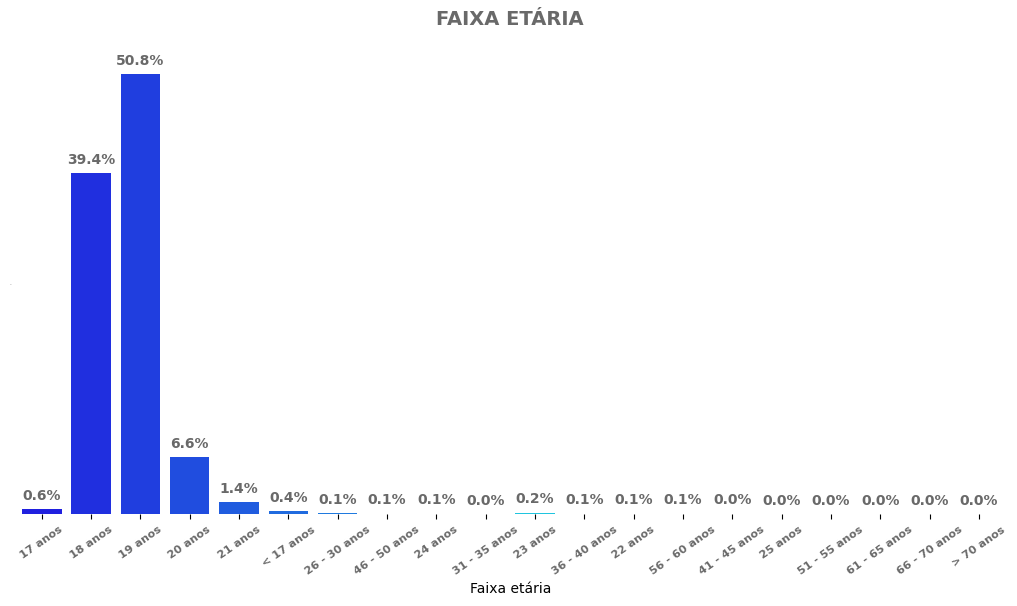

In [23]:

palette = [
    "#0000FF", "#0014FF", "#0028FF", "#003CFF", "#0050FF", "#0064FF", "#0078FF",
    "#008CFF", "#00A0FF", "#00B4FF", "#00DCFF", "#00F0FF", "#00FFF0",
    "#00FFDC", "#00FFC8", "#00FFA0",  "#00FF64",
    "#00FF50", "#00FF28",  "#FF0000"
]

labels=['17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '< 17 anos', '26 - 30 anos', '46 - 50 anos', '24 anos', '31 - 35 anos', '23 anos', '36 - 40 anos', '22 anos', '56 - 60 anos', '41 - 45 anos', '25 anos', '51 - 55 anos', '61 - 65 anos', '66 - 70 anos', '> 70 anos']

plt.figure(figsize=(28, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_FAIXA_ETARIA", hue="TP_FAIXA_ETARIA", palette=palette, dodge=False, legend=False)

plt.title('FAIXA ETÁRIA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

#plt.legend(loc=1, labels=labels)

plt.xlabel('Faixa etária', fontsize=10, color='black')

nlabels=labels
plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation=35);

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.TP_FAIXA_ETARIA)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=10, fontweight = 'bold')

plt.show();

### Neste gráfico conseguimos notar a **distribuição das idades dos participantes do ENEM**.


---



É possível notar que cerca de **95%** dos partcipantes estão concentrados entre 18 e 20 anos.

# SEXO

---



In [24]:
dados_cru.TP_SEXO.value_counts(normalize=True).sort_index()*100

TP_SEXO
F    62.408336
M    37.591664
Name: proportion, dtype: float64

<ipython-input-25-e49864a489c3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');


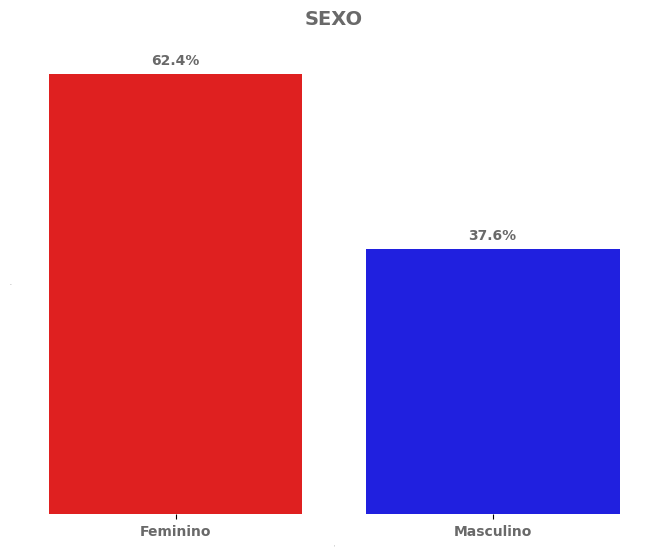

In [25]:

palette = ["#FF0000", "#0000FF"]

labels=['Feminino', 'Masculino']

plt.figure(figsize=(18, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_SEXO", hue="TP_SEXO", palette=palette, dodge=False, legend=False)

plt.title('SEXO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

#plt.legend(loc=1, labels=labels)

plt.xlabel([], fontsize=0)

nlabels=['Feminino', 'Masculino']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.TP_SEXO)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=10, fontweight = 'bold')

plt.show();

### Neste gráfico conseguimos notar a **distribuição do sexo dos participantes do ENEM.**


---



É possível notar que cerca o sexo feminino representa a maior parcela de participantes.

# SEXO X IDADE

---








<ipython-input-26-0bff4971080d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation=35);


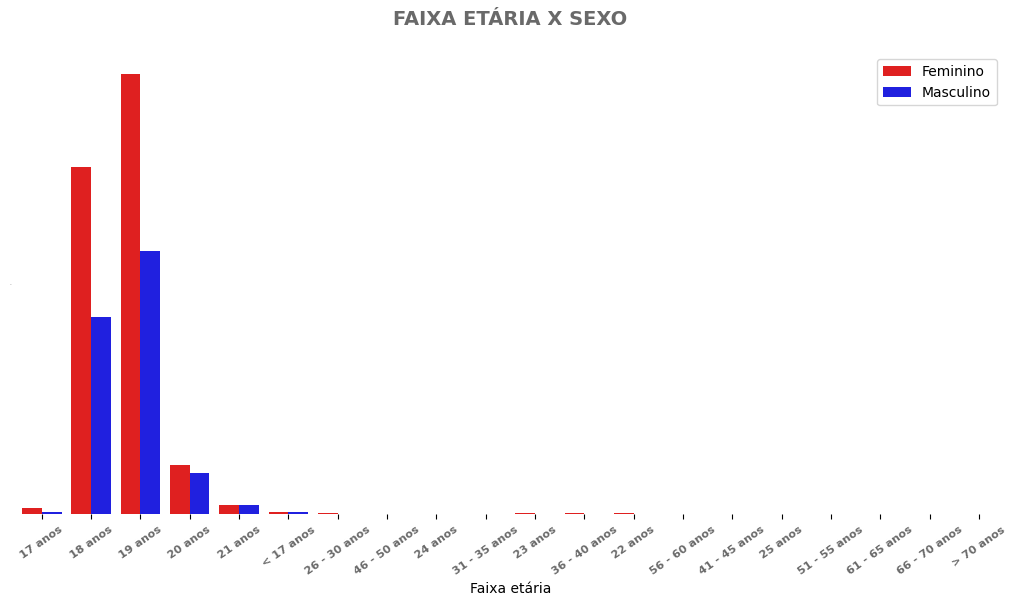

In [26]:


palette = ["#FF0000", "#0000FF"]

labels=['17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '< 17 anos', '26 - 30 anos', '46 - 50 anos', '24 anos', '31 - 35 anos', '23 anos', '36 - 40 anos', '22 anos', '56 - 60 anos', '41 - 45 anos', '25 anos', '51 - 55 anos', '61 - 65 anos', '66 - 70 anos', '> 70 anos']
slabels=['Feminino', 'Masculino']

plt.figure(figsize=(28, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_FAIXA_ETARIA", hue="TP_SEXO", palette=palette, legend=False)

plt.title('FAIXA ETÁRIA X SEXO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.legend(loc=1, labels=slabels)

plt.xlabel('Faixa etária', fontsize=10, color='black')

nlabels=labels
plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation=35);

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)


plt.show();

### Este gráfico busca demonstar a **faixa etária dos partcipantes separados pelo sexo.**


---


Assim como já vimos acima e era de se esperar o número de participantes do sexo Feminino é superior ao masculino em todas faixas etárias.

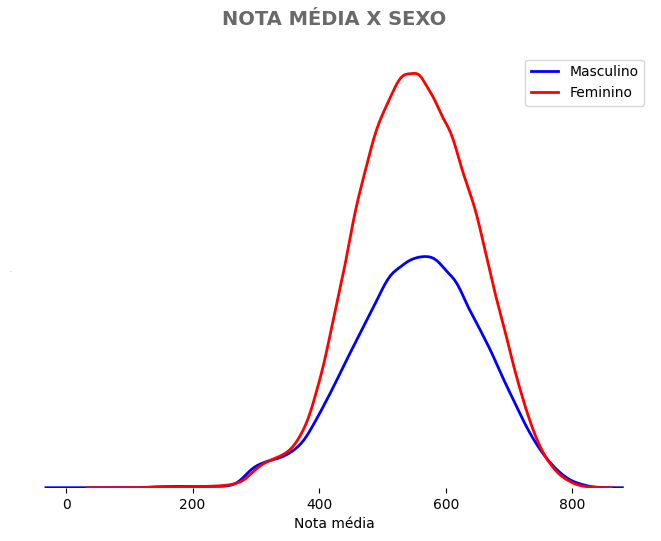

In [101]:
palette = ["#FF0000", "#0000FF"]


plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", hue="TP_SEXO", fill=False, palette=palette,
   linewidth=2)

plt.legend(loc=1, labels=['Masculino', 'Feminino'])

plt.title('NOTA MÉDIA X SEXO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Nota média', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# TIPO DE ESCOLA - ENSINO MÉDIO

---



In [27]:
dados_cru.TP_ESCOLA.value_counts(normalize=True).round(4)*100

TP_ESCOLA
2    79.63
3    20.37
1     0.00
Name: proportion, dtype: float64

<ipython-input-28-30c04ececd12>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');


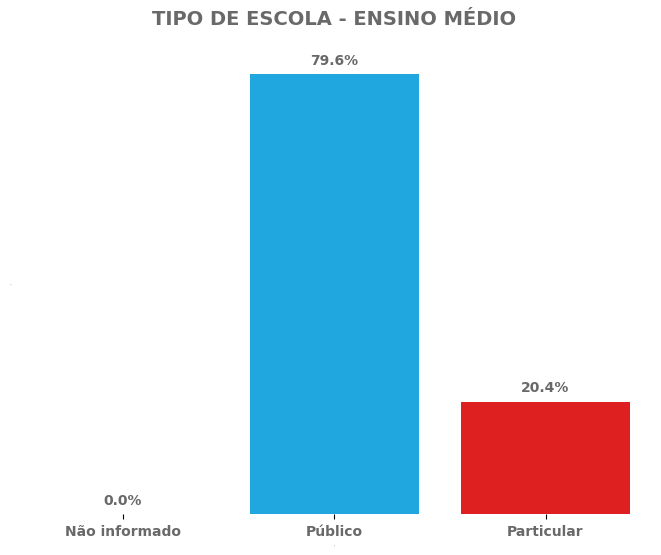

In [28]:


plt.show()

palette = ["#0000FF", "#00B4FF", "#FF0000"]

labels=['Não informado', 'Público', 'Particular']

plt.figure(figsize=(18, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_ESCOLA", hue="TP_ESCOLA", palette=palette, dodge=False, legend=False)

plt.title('TIPO DE ESCOLA - ENSINO MÉDIO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

#plt.legend(loc=1, labels=labels)

plt.xlabel([], fontsize=0)

nlabels=['Não informado', 'Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.TP_ESCOLA)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=10, fontweight = 'bold')

plt.show();

### Aqui notamos como é **distribuído** os participantes,  **pelo tipo de escola em que frequentou no ensino médio.**


---

Notável que a maioria quase **80%** dos participantes estudaram em **escola pública.**

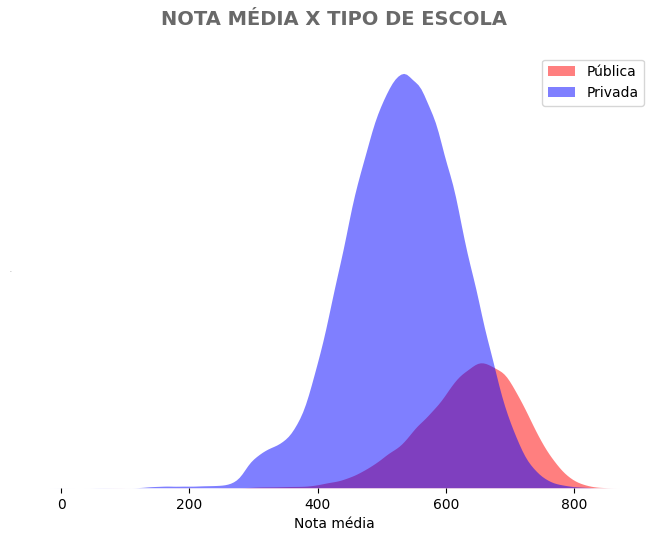

In [29]:
palette = [
    "#0000FF", "#FF0000"
]

dados_filtrados = dados_cru[~dados_cru['TP_ESCOLA'].isin([1])]

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_filtrados, x="NOTA_MEDIA", hue="TP_ESCOLA", fill=True, palette=palette,
   alpha=.5, linewidth=0)

plt.legend(['Pública', 'Privada'], fontsize=10)

plt.title('NOTA MÉDIA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Nota média', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Neste gráfico de densidade temos a representação da **NOTA MÉDIA** **em relação ao tipo de ensino.**

---



Possível notar que o gráfico que representa alunos que estudaram/estudam em escolas particulares tendem a ter **NOTA MÉDIA** maior que os alunos de esola pública.

In [30]:
dados_cru.IN_TREINEIRO.value_counts().sort_index()

IN_TREINEIRO
0    224462
Name: count, dtype: int64

# ESTADOS

---



In [31]:
Estados_ = dados_cru.SG_UF_ESC.value_counts().index

<ipython-input-143-586008293637>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=Estados_, fontsize=10, color='dimgrey', fontweight = 'bold');


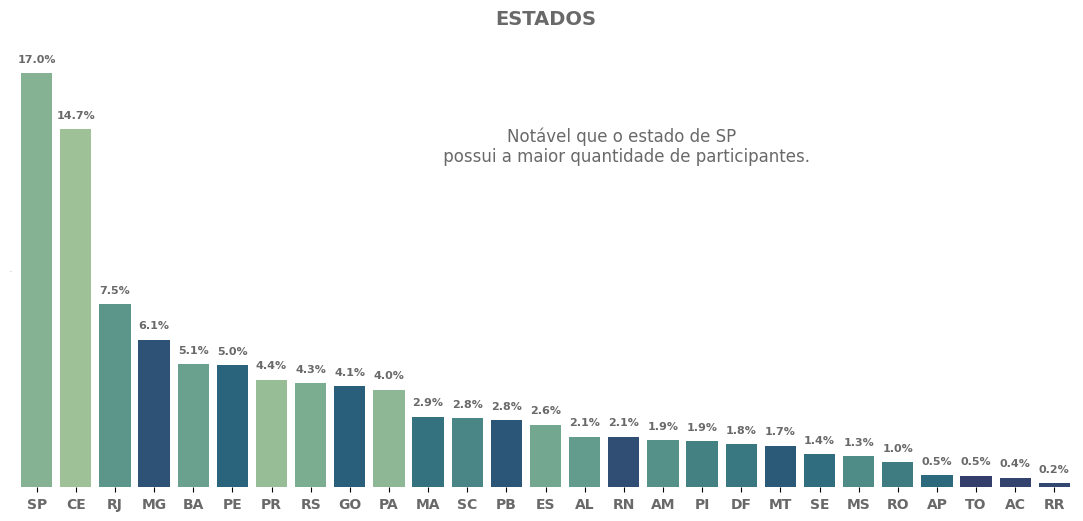

In [143]:
palette = [
    "#0000FF", "#0014FF", "#0028FF", "#003CFF", "#0050FF", "#0064FF", "#0078FF",
    "#008CFF", "#00A0FF", "#00B4FF", "#00C8FF", "#00DCFF", "#00F0FF", "#00FFF0",
    "#00FFDC", "#00FFC8", "#00FFB4", "#00FFA0", "#00FF8C", "#00FF78", "#00FF64",
    "#00FF50", "#00FF3C", "#00FF28", "#00FF14", "#00FF00", "#FF0000"
]

plt.figure(figsize=(30, 5.65))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="SG_UF_ESC", hue="SG_UF_ESC", palette='crest', dodge=False, order=Estados_)

plt.title('ESTADOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('', fontsize=10, color='black')
plot.set_xticklabels(labels=Estados_, fontsize=10, color='dimgrey', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.SG_UF_ESC)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=8, fontweight = 'bold')

text = 'Notável que o estado de SP \n possui a maior quantidade de participantes.'
plt.text(x=15, y=29997, s=text, fontsize=12, color='dimgrey', ha='center')

plt.show()

### Neste gráfico é representado a **quantidade de pessoas que realizram o ENEM por estado.**

---

Notável que o estado de SP é o com maior quantidade de participantes.

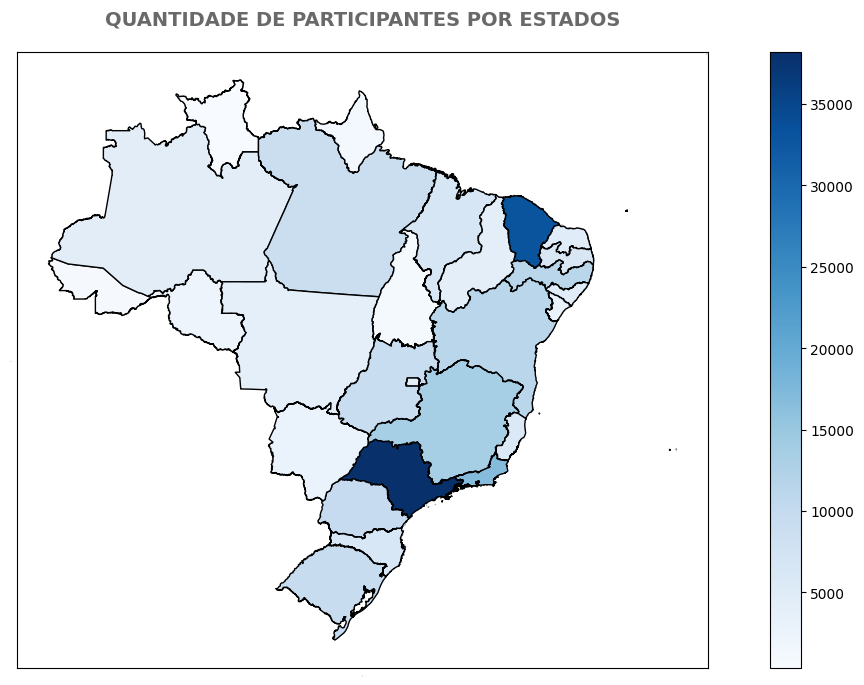

In [33]:
ax2 = BRASIL.plot(column='QUANTIDADE',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('QUANTIDADE DE PARTICIPANTES POR ESTADOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.legend([], fontsize=0)
ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Mesmo sentido da outra representação porém em um mapa do Brasil

In [34]:
dados_cru.describe().round(2).T

count        mean        std        min         25%  \
TP_FAIXA_ETARIA   224462.0        2.77       1.06        1.0        2.00   
TP_COR_RACA       224462.0        1.98       1.00        0.0        1.00   
TP_ST_CONCLUSAO   224462.0        2.00       0.00        2.0        2.00   
TP_ESCOLA         224462.0        2.20       0.40        1.0        2.00   
IN_TREINEIRO      224462.0        0.00       0.00        0.0        0.00   
CO_MUNICIPIO_ESC  224462.0  3123972.25  991701.31  1100015.0  2309607.00   
TP_PRESENCA_CN    224462.0        1.00       0.00        1.0        1.00   
TP_PRESENCA_CH    224462.0        1.00       0.00        1.0        1.00   
TP_PRESENCA_LC    224462.0        1.00       0.00        1.0        1.00   
TP_PRESENCA_MT    224462.0        1.00       0.00        1.0        1.00   
NU_NOTA_CN        224462.0      496.89      84.86        0.0      441.10   
NU_NOTA_CH        224462.0      529.44      84.91        0.0      476.10   
NU_NOTA_LC        224462.0      524.24      72.88        0.0      479.00   
NU_NOTA_MT        224462.0      544.97     130.13        0.0      442.10   
TP_LINGUA         224462.0        0.40       0.49        0.0        0.00   
NU_NOTA_REDACAO   224462.0      663.26     210.65        0.0      560.00   
NOTA_MEDIA        224462.0      551.76      96.37        0.0      486.84   

                         50%         75%         max  
TP_FAIXA_ETARIA         3.00        3.00       20.00  
TP_COR_RACA             2.00        3.00        5.00  
TP_ST_CONCLUSAO         2.00        2.00        2.00  
TP_ESCOLA               2.00        2.00        3.00  
IN_TREINEIRO            0.00        0.00        0.00  
CO_MUNICIPIO_ESC  3138609.00  3550308.00  5300108.00  
TP_PRESENCA_CN          1.00        1.00        1.00  
TP_PRESENCA_CH          1.00        1.00        1.00  
TP_PRESENCA_LC          1.00        1.00        1.00  
TP_PRESENCA_MT          1.00        1.00        1.00  
NU_NOTA_CN            494.30      551.40      856.70  
NU_NOTA_CH            536.20      589.10      823.00  
NU_NOTA_LC            529.30      575.40      801.10  
NU_NOTA_MT            537.70      641.70      958.60  
TP_LINGUA               0.00        1.00        1.00  
NU_NOTA_REDACAO       680.00      840.00     1000.00  
NOTA_MEDIA            553.32      620.16      847.26

# RAÇA DECLARADA

---




In [35]:
rc = dados_cru.TP_COR_RACA.value_counts(ascending=False).index
rc

Index([1, 3, 2, 4, 0, 5], dtype='int64', name='TP_COR_RACA')

<ipython-input-153-52e3d48ce50b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');


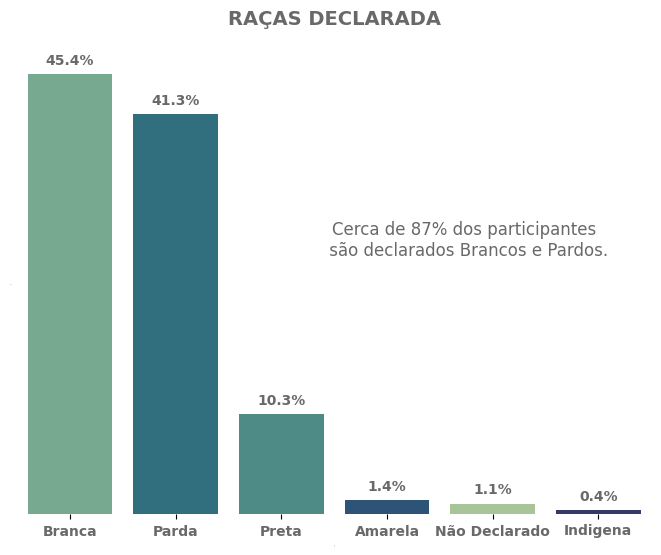

In [153]:
palette = ["#0000FF", "#0055FF", "#00AAFF", "#00FFAA", "#FFAA00", "#FF0000"]
labels=['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena']

plt.figure(figsize=(18, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_COR_RACA", hue="TP_COR_RACA", palette='crest', dodge=False, order=rc, legend=False)

plt.title('RAÇAS DECLARADA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

#plt.legend(loc=1, labels=labels)

plt.xlabel([], fontsize=0)

nlabels=['Branca', 'Parda', 'Preta', 'Amarela', 'Não Declarado', 'Indigena']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold');

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.TP_COR_RACA)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=10, fontweight = 'bold')

text = 'Cerca de 87% dos participantes \n são declarados Brancos e Pardos.'
plt.text(x=3.75, y=59990, s=text, fontsize=12, color='dimgrey', ha='center')

plt.show();

### Gráfico que compara os a **quantidade de participantes de diferentes raça.**

---



Mais de **90%** das raças declaradas estão entre, **Brancas**, **Pardas** e **Pretas**.

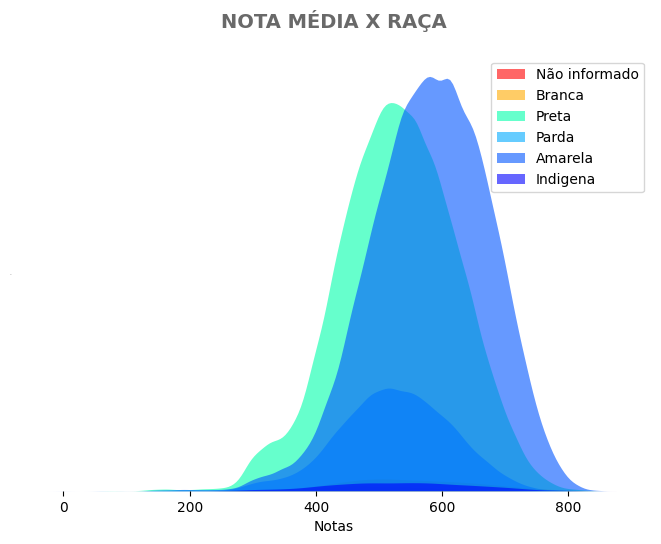

In [37]:
palette = ["#0000FF", "#0055FF", "#00AAFF", "#00FFAA", "#FFAA00", "#FF0000"]

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", hue="TP_COR_RACA", fill=True, palette=palette,alpha=.6, linewidth=0)

plt.title('NOTA MÉDIA X RAÇA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

plt.legend(loc=1, labels=['Não informado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'])

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [38]:
nota_raca = dados_cru[['NOTA_MEDIA', 'TP_COR_RACA']]
nota_raca

NOTA_MEDIA  TP_COR_RACA
3            564.28            3
4            425.38            3
11           671.12            3
16           586.04            1
41           584.94            1
...             ...          ...
1048557      550.42            1
1048558      492.84            3
1048565      418.88            3
1048569      564.62            3
1048572      462.78            2

[224462 rows x 2 columns]

<Axes: ylabel='Density'>

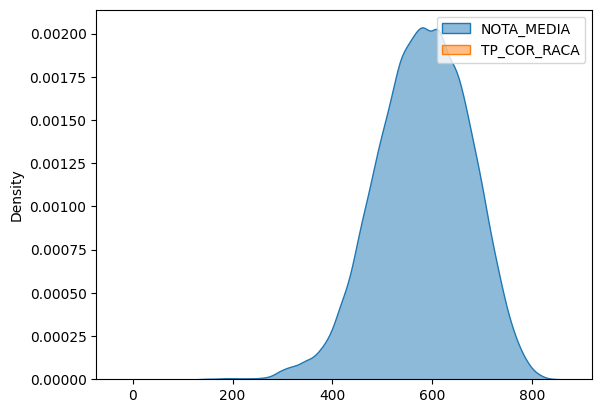

In [39]:
sns.kdeplot(nota_raca[nota_raca['TP_COR_RACA'].isin([1])],fill=True, color="#0078FF",alpha=.5, warn_singular=False)

<Axes: ylabel='Density'>

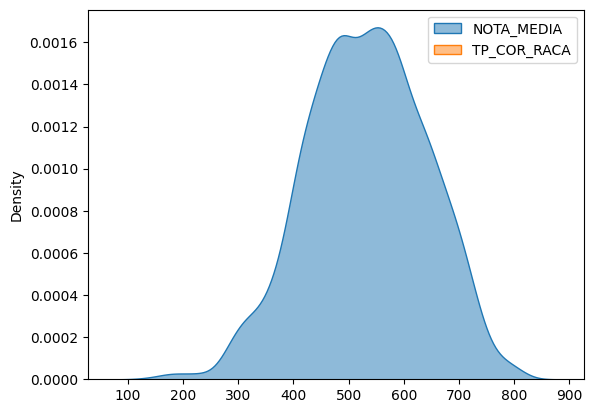

In [40]:
sns.kdeplot(nota_raca[nota_raca['TP_COR_RACA'].isin([0])],fill=True, color="#0078FF",alpha=.5, warn_singular=False)

<Axes: ylabel='Density'>

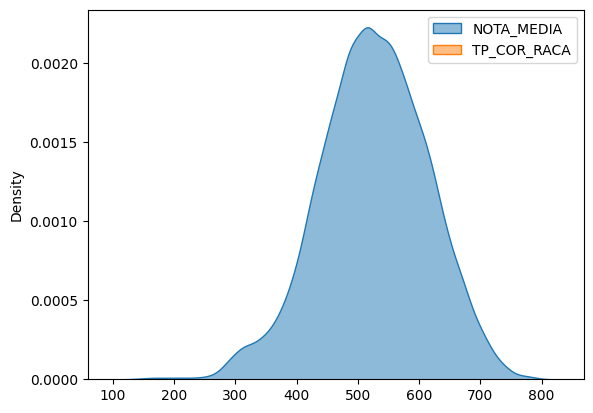

In [41]:
sns.kdeplot(nota_raca[nota_raca['TP_COR_RACA'].isin([2])],fill=True, color="#0078FF",alpha=.5, warn_singular=False)

# NOTAS CN

---



---



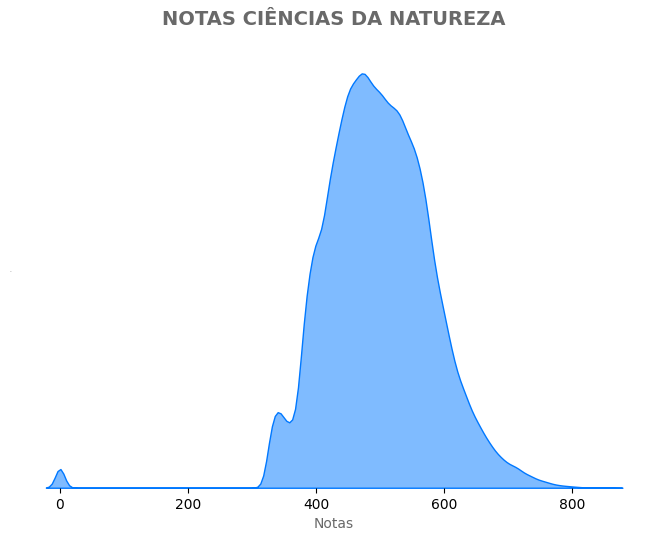

In [42]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_CN", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS CIÊNCIAS DA NATUREZA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='dimgrey')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as notas de **Ciências da Natureza.**

# NOTAS CH

---



---



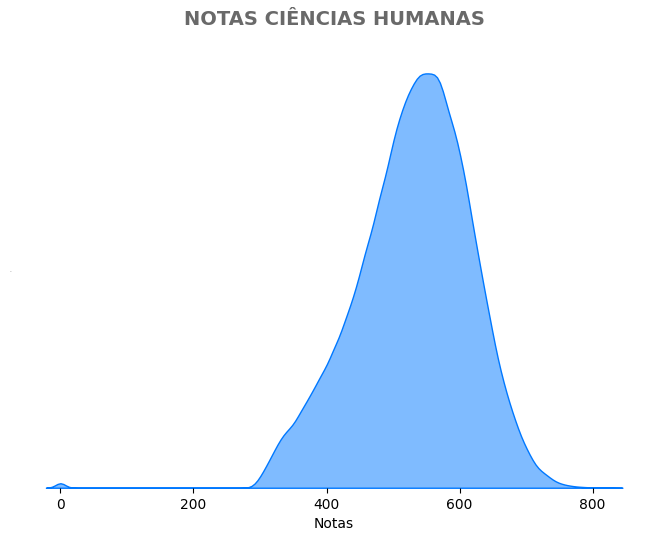

In [43]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_CH", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS CIÊNCIAS HUMANAS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as notas de **Ciências Humanas.**

# NOTAS LC

---



---



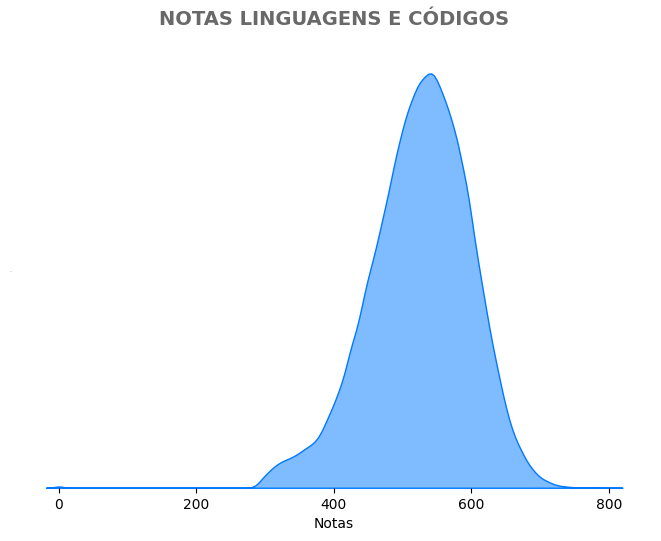

In [44]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_LC", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS LINGUAGENS E CÓDIGOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as notas de **Linguagens e Códigos.**

# NOTAS MT

---



---






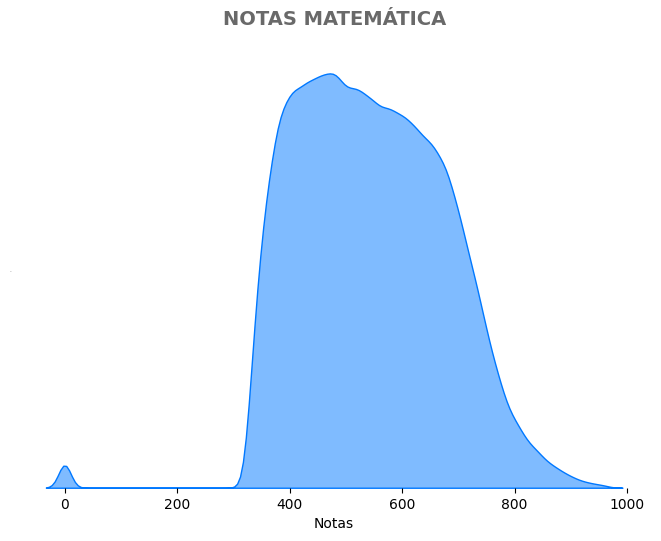

In [45]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_MT", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS MATEMÁTICA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as notas de **Matemática.**

# NOTAS REDAÇÃO

---



---



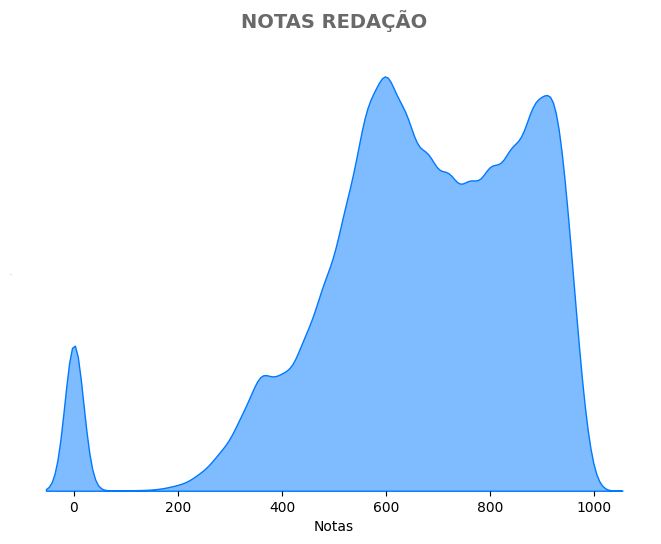

In [46]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_REDACAO", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS REDAÇÃO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as notas de **Redação.**

# NOTAS MÉDIA

---



---



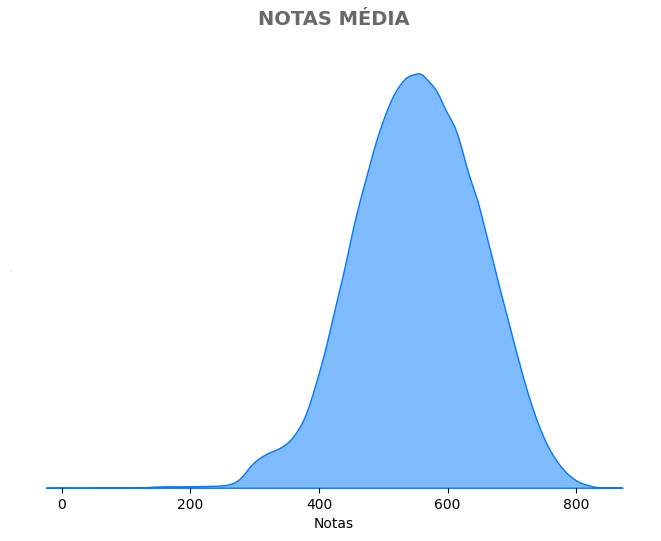

In [47]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS MÉDIA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos um gráfico de densidade representando as **Médias.**

# ANÁLISES SOCIOECÔNOMICAS

---



---



## Relaçao renda e nota total

In [48]:
dados_cru.head()

TP_FAIXA_ETARIA TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ESCOLA  \
3                 2       F            3                2          2   
4                 3       F            3                2          2   
11                3       M            3                2          2   
16                4       F            1                2          2   
41                3       M            1                2          2   

    IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC SG_UF_ESC  TP_PRESENCA_CN  \
3              0         2304400.0        Fortaleza        CE               1   
4              0         2311306.0          Quixadá        CE               1   
11             0         4128005.0          Ubiratã        PR               1   
16             0         1501402.0            Belém        PA               1   
41             0         3550308.0        São Paulo        SP               1   

    ...  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  NU_NOTA_REDACAO  Q001  \
3   ...       508.5       507.2       466.7          0            880.0     D   
4   ...       379.2       446.9       338.3          0            560.0     B   
11  ...       667.6       607.9       691.9          0            780.0     D   
16  ...       553.1       544.4       437.0          0            880.0     E   
41  ...       576.3       596.5       628.1          0            600.0     C   

    Q002  Q006  Q025 NOTA_MEDIA  
3      D     C     B     564.28  
4      B     B     A     425.38  
11     E     D     B     671.12  
16     E     B     B     586.04  
41     C     D     B     584.94  

[5 rows x 24 columns]

In [49]:
nota_renda = dados_cru[['NOTA_MEDIA', 'Q006']]

In [50]:
nota_renda['Q006'].value_counts()

Q006
B    68581
C    34955
D    25050
E    17619
G    16448
A    10721
F    10579
H     8913
I     5416
J     4928
Q     3936
K     3904
O     2835
P     2814
N     2803
L     2652
M     2308
Name: count, dtype: int64

<ipython-input-172-d455a1107235>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation = 35);


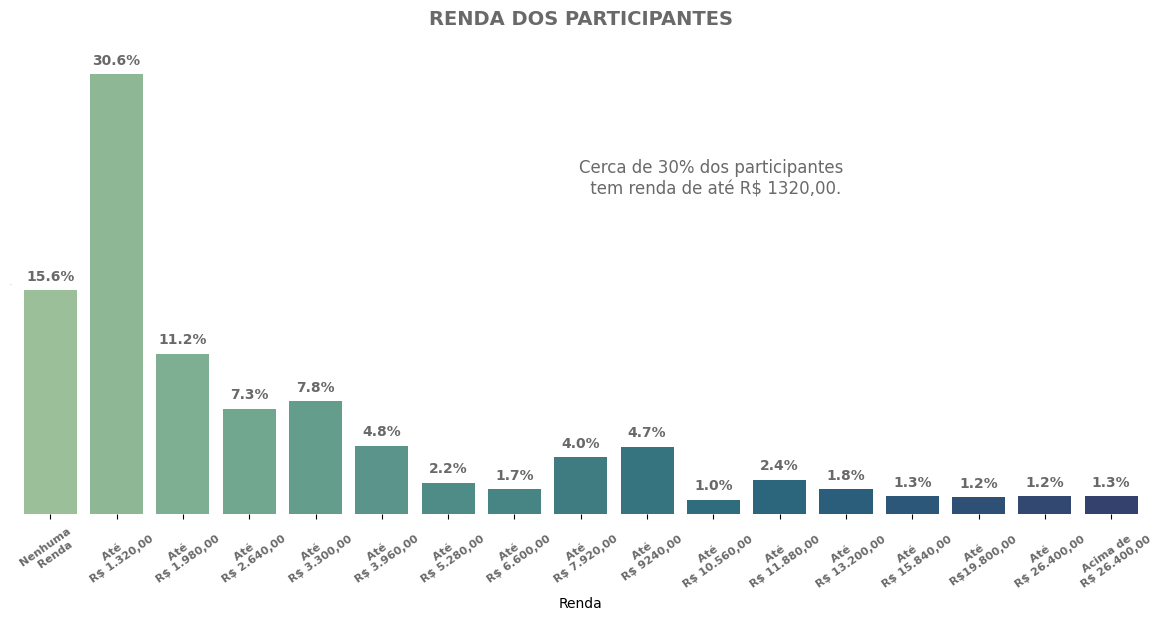

In [172]:
ordem = nota_renda.Q006.value_counts().index

labels=['Nenhuma \n Renda', 'Até \n R$ 1.320,00', 'Até \n R$ 1.980,00', 'Até \n R$ 2.640,00', 'Até \n R$ 3.300,00', 'Até \n R$ 3.960,00', 'Até \n R$ 5.280,00', 'Até \n R$ 6.600,00', 'Até \n R$ 7.920,00', 'Até \n R$ 9240,00', 'Até \n R$ 10.560,00', 'Até \n R$ 11.880,00', 'Até \n R$ 13.200,00', 'Até \n R$ 15.840,00', 'Até \n R$19.800,00', 'Até \n R$ 26.400,00', 'Acima de \n R$ 26.400,00']

plt.figure(figsize=(32, 6))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=nota_renda, x="Q006", hue="Q006", palette='crest', dodge=False, legend=False)

plt.title('RENDA DOS PARTICIPANTES', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

#plt.legend(loc=1, labels=labels)

plt.xlabel('Renda', fontsize=10, color='black')

nlabels=labels
plot.set_xticklabels(labels=nlabels, fontsize=8, color='dimgrey', fontweight = 'bold', rotation = 35);

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

total = len(dados_cru.TP_FAIXA_ETARIA)
for p in plot.patches:
    height = p.get_height()
    if height > 0:
        percentagem = f'{100 * height / total:.1f}%'
        plot.annotate(percentagem, (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='dimgrey', fontsize=10, fontweight = 'bold')

text = 'Cerca de 30% dos participantes \n tem renda de até R$ 1320,00.'
plt.text(x=10, y=49990, s=text, fontsize=12, color='dimgrey', ha='center')

plt.show();

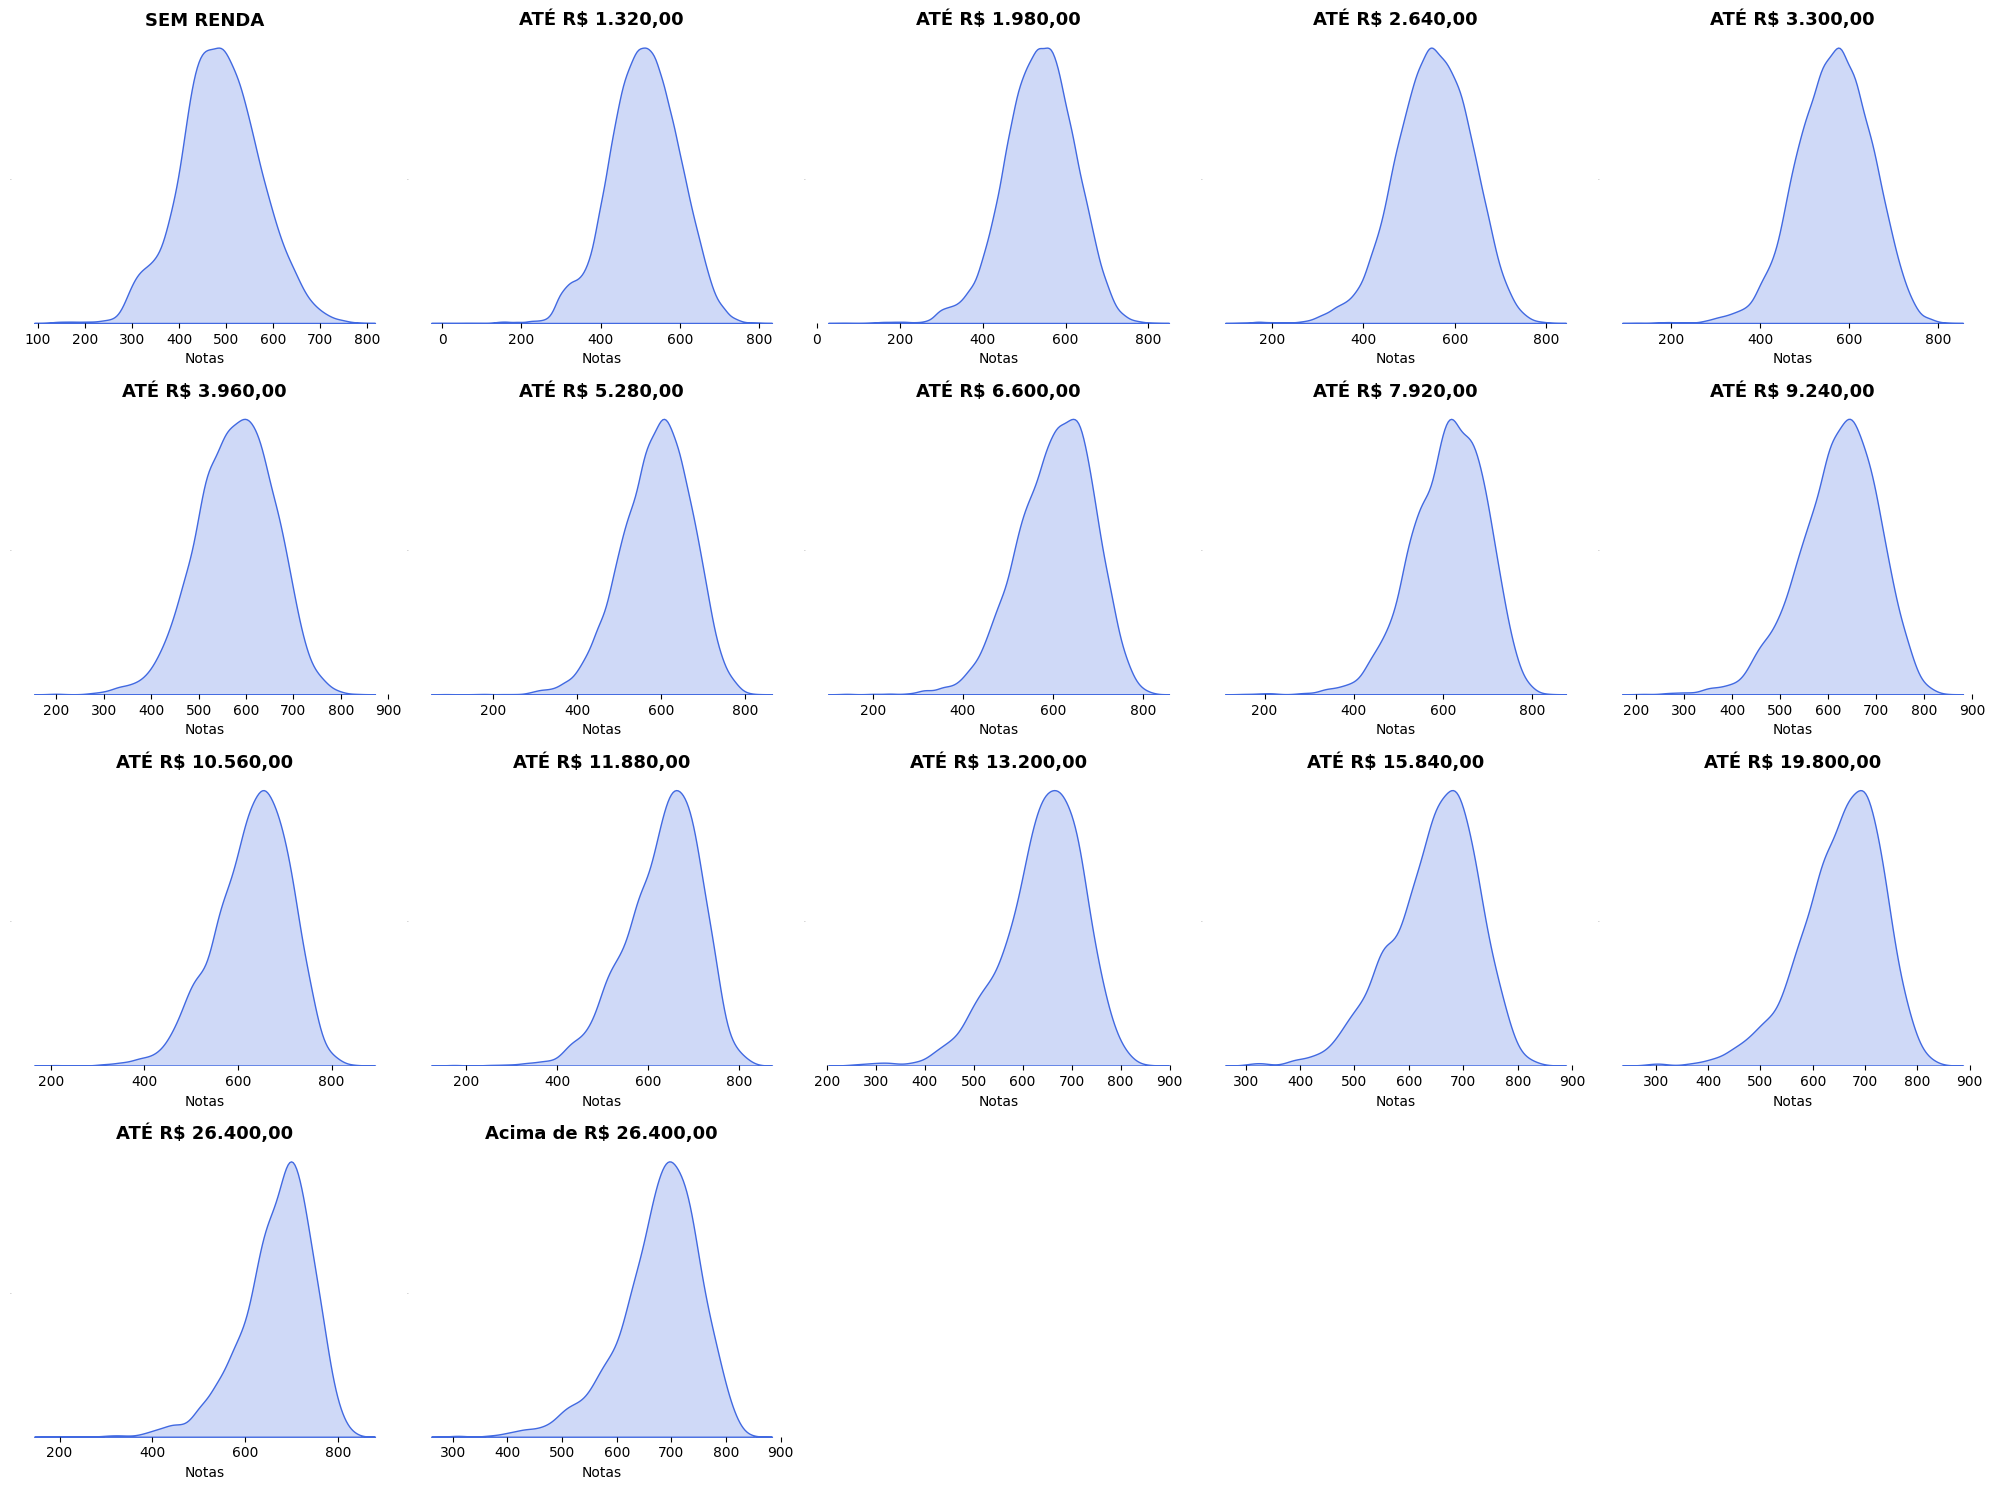

In [52]:

fig, axs = plt.subplots(4, 5, figsize=(20, 15))

categorias = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

sns.kdeplot(nota_renda[nota_renda['Q006'] == 'A']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'B']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'C']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'D']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'E']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'F']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'G']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'H']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'I']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'J']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'K']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'L']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'M']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'N']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'O']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'P']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[3, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'Q']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[3, 1])


for ax in axs.flatten():
    ax.set_yticks([])
    ax.set_xlabel('Notas', fontsize=10, color='black')
    ax.set_ylabel([], fontsize=0)

axs[0, 0].set_title('SEM RENDA', fontsize=13, fontweight='bold')
axs[0, 1].set_title('ATÉ R$ 1.320,00', fontsize=13, fontweight='bold')
axs[0, 2].set_title('ATÉ R$ 1.980,00', fontsize=13, fontweight='bold')
axs[0, 3].set_title('ATÉ R$ 2.640,00', fontsize=13, fontweight='bold')
axs[0, 4].set_title('ATÉ R$ 3.300,00', fontsize=13, fontweight='bold')
axs[1, 0].set_title('ATÉ R$ 3.960,00', fontsize=13, fontweight='bold')
axs[1, 1].set_title('ATÉ R$ 5.280,00', fontsize=13, fontweight='bold')
axs[1, 2].set_title('ATÉ R$ 6.600,00', fontsize=13, fontweight='bold')
axs[1, 3].set_title('ATÉ R$ 7.920,00', fontsize=13, fontweight='bold')
axs[1, 4].set_title('ATÉ R$ 9.240,00', fontsize=13, fontweight='bold')
axs[2, 0].set_title('ATÉ R$ 10.560,00', fontsize=13, fontweight='bold')
axs[2, 1].set_title('ATÉ R$ 11.880,00', fontsize=13, fontweight='bold')
axs[2, 2].set_title('ATÉ R$ 13.200,00', fontsize=13, fontweight='bold')
axs[2, 3].set_title('ATÉ R$ 15.840,00', fontsize=13, fontweight='bold')
axs[2, 4].set_title('ATÉ R$ 19.800,00', fontsize=13, fontweight='bold')
axs[3, 0].set_title('ATÉ R$ 26.400,00', fontsize=13, fontweight='bold')
axs[3, 1].set_title('Acima de R$ 26.400,00', fontsize=13, fontweight='bold')

for i in range(len(categorias), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])
sns.despine(bottom =True, left=True)
plt.tight_layout()

plt.show()

### Aqui temos graficos de **distribuição nota média de acordo com a renda familiar dos participantes.**

---



Importante resaltar que quando maior a renda notamos que o grafico se tende a uma assmetria à direita, acumulando as maiores notas nas maiores rendas.  

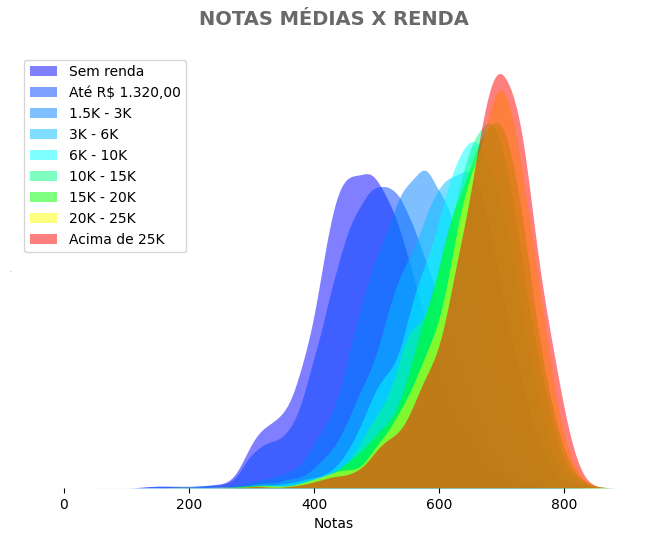

In [53]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(nota_renda[nota_renda['Q006'] == 'A']['NOTA_MEDIA'], label = 'Sem renda', fill =True, alpha=.5, linewidth=0, color='#0000FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'B']['NOTA_MEDIA'], label = 'Até R$ 1.320,00', fill =True, alpha=.5, linewidth=0, color='#0040FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'E']['NOTA_MEDIA'], label = '1.5K - 3K', fill =True, alpha=.5, linewidth=0, color='#0080FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'H']['NOTA_MEDIA'], label = '3K - 6K', fill =True, alpha=.5, linewidth=0, color='#00BFFF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'K']['NOTA_MEDIA'], label = '6K - 10K', fill =True, alpha=.5, linewidth=0, color='#00FFFF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'N']['NOTA_MEDIA'], label = '10K - 15K', fill =True, alpha=.5, linewidth=0, color='#00FF80')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'O']['NOTA_MEDIA'], label = '15K - 20K', fill =True, alpha=.5, linewidth=0, color='#00FF00')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'P']['NOTA_MEDIA'], label = '20K - 25K', fill =True, alpha=.5, linewidth=0, color='#FFFF00')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'Q']['NOTA_MEDIA'], label = 'Acima de 25K', fill =True, alpha=.5, linewidth=0, color='#FF0000')

plt.title('NOTAS MÉDIAS X RENDA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

### O mesmo sentido do gráfico acima porém agora todos juntos facilitando a visualização.

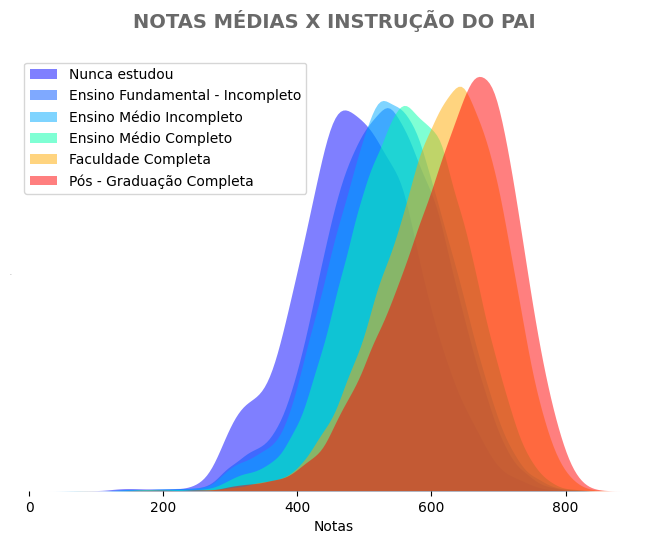

In [54]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)



sns.kdeplot(dados_cru[dados_cru['Q001'] == 'A']['NOTA_MEDIA'], fill=True, label ='Nunca estudou', color='#0000FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'C']['NOTA_MEDIA'], fill=True, label = 'Ensino Fundamental - Incompleto', color='#0055FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'D']['NOTA_MEDIA'], fill=True, label ='Ensino Médio Incompleto', color='#00AAFF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'E']['NOTA_MEDIA'], fill=True, label = 'Ensino Médio Completo', color='#00FFAA', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'F']['NOTA_MEDIA'], fill=True, label ='Faculdade Completa', color='#FFAA00', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'G']['NOTA_MEDIA'], fill=True, label = 'Pós - Graduação Completa', color='#FF0000', alpha=.5, linewidth=0)

plt.title('NOTAS MÉDIAS X INSTRUÇÃO DO PAI', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

### Aqui temos grafico de distribuição nota média de acordo com a **Instrução do Pai** dos participantes.

---



Importante resaltar que quando maior a **Instrução do Pai** notamos que o grafico se tende a uma assmetria à direita.

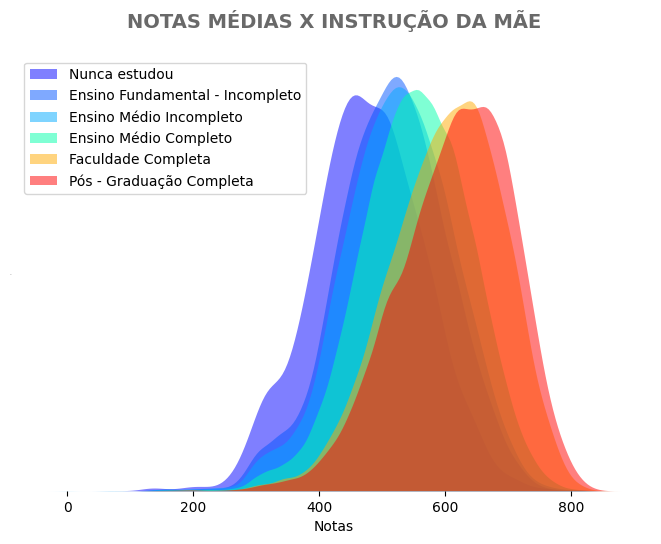

In [55]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(dados_cru[dados_cru['Q002'] == 'A']['NOTA_MEDIA'], fill=True, label ='Nunca estudou', color='#0000FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'C']['NOTA_MEDIA'], fill=True, label = 'Ensino Fundamental - Incompleto', color='#0055FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'D']['NOTA_MEDIA'], fill=True, label ='Ensino Médio Incompleto', color='#00AAFF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'E']['NOTA_MEDIA'], fill=True, label = 'Ensino Médio Completo', color='#00FFAA', alpha=.5, linewidth=0 )
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'F']['NOTA_MEDIA'], fill=True, label ='Faculdade Completa', color='#FFAA00',  alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'G']['NOTA_MEDIA'], fill=True, label = 'Pós - Graduação Completa', color='#FF0000',  alpha=.5, linewidth=0)

plt.title('NOTAS MÉDIAS X INSTRUÇÃO DA MÃE', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

### Aqui temos grafico de distribuição de nota média de acordo com a **Instrução da Mãe** dos participantes.

---



Importante resaltar que quando maior a **Instrução da Mãe** notamos que o grafico se tende a uma assmetria à direita.

# ACESSO À INTERNET

---



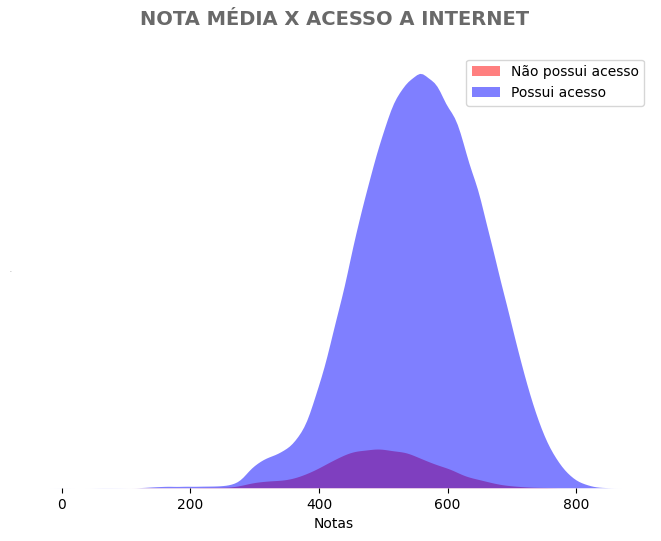

In [56]:
palette = [
    "#0000FF", "#FF0000"
]

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", hue="Q025", fill=True, palette=palette,alpha=.5, linewidth=0)

plt.legend(['Não possui acesso', 'Possui acesso'], fontsize=10)

plt.title('NOTA MÉDIA X ACESSO A INTERNET', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

### Aqui temos grafico de distribuição de nota média de acordo com  **Acesso à Internet** dos participantes.

---



Importante ressaltar que a nota daqueles que possuem acesso como já era de se imaginar é superior. Mas vale ressaltar que ainda possuímos participantes que nem ao menos possuem acesso à internet, o que obviamente irá dificultar seus estudos.

# BOX PLOTS

---



---
 Durante esta análise é possível notar a presença de diversos Outliers mas no caso desta análise os mesmos são importantes e nào desprezíveis pois as notas dos estudantes variam amplamente devido a diferenças individuais em habilidades, preparação, e outros fatores socioeconômicos e educacionais. Essa variação natural pode levar a alguns alunos se destacarem muito positivamente ou negativamente.


In [57]:
dados_filtrados = dados_cru[~dados_cru['TP_ESCOLA'].isin([1])]
dados_filtrados

TP_FAIXA_ETARIA TP_SEXO  TP_COR_RACA  TP_ST_CONCLUSAO  TP_ESCOLA  \
3                      2       F            3                2          2   
4                      3       F            3                2          2   
11                     3       M            3                2          2   
16                     4       F            1                2          2   
41                     3       M            1                2          2   
...                  ...     ...          ...              ...        ...   
1048557                3       F            1                2          2   
1048558                2       F            3                2          2   
1048565                2       F            3                2          2   
1048569                2       F            3                2          2   
1048572                3       M            2                2          2   

         IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC SG_UF_ESC  \
3                   0         2304400.0        Fortaleza        CE   
4                   0         2311306.0          Quixadá        CE   
11                  0         4128005.0          Ubiratã        PR   
16                  0         1501402.0            Belém        PA   
41                  0         3550308.0        São Paulo        SP   
...               ...               ...              ...       ...   
1048557             0         3525904.0          Jundiaí        SP   
1048558             0         2112209.0            Timon        MA   
1048565             0         2306900.0        Jaguaribe        CE   
1048569             0         2306553.0          Itarema        CE   
1048572             0         3502101.0        Andradina        SP   

         TP_PRESENCA_CN  ...  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
3                     1  ...       508.5       507.2       466.7          0   
4                     1  ...       379.2       446.9       338.3          0   
11                    1  ...       667.6       607.9       691.9          0   
16                    1  ...       553.1       544.4       437.0          0   
41                    1  ...       576.3       596.5       628.1          0   
...                 ...  ...         ...         ...         ...        ...   
1048557               1  ...       477.0       501.7       516.0          1   
1048558               1  ...       413.1       483.3       501.0          0   
1048565               1  ...       412.4       472.3       401.4          1   
1048569               1  ...       454.0       493.0       494.0          0   
1048572               1  ...       455.4       499.8       524.6          1   

         NU_NOTA_REDACAO  Q001  Q002  Q006  Q025 NOTA_MEDIA  
3                  880.0     D     D     C     B     564.28  
4                  560.0     B     B     B     A     425.38  
11                 780.0     D     E     D     B     671.12  
16                 880.0     E     E     B     B     586.04  
41                 600.0     C     C     D     B     584.94  
...                  ...   ...   ...   ...   ...        ...  
1048557            800.0     D     E     C     B     550.42  
1048558            560.0     B     E     B     B     492.84  
1048565            360.0     A     A     B     B     418.88  
1048569            900.0     B     B     B     B     564.62  
1048572            380.0     E     E     B     B     462.78  

[224460 rows x 24 columns]

<ipython-input-58-5b4bbeff4a62>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


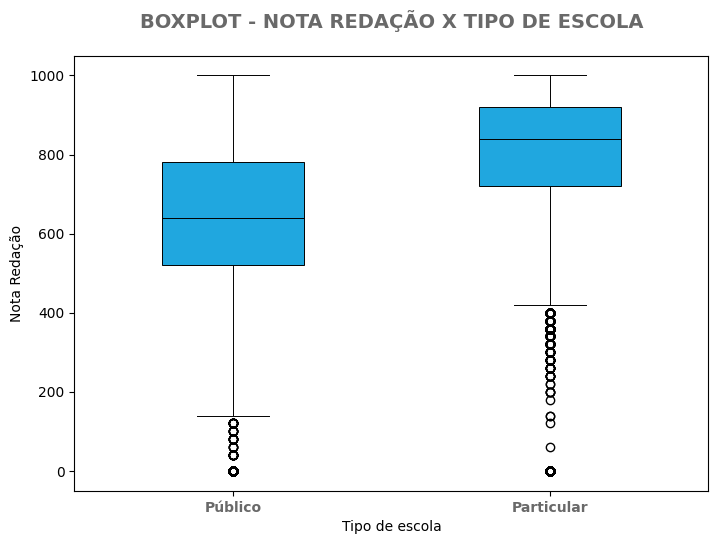

In [58]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_REDACAO', color='#00B4FF', linecolor="black", linewidth=.70, gap=.1, width=.5)

nlabels=['Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA REDAÇÃO X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

### Box - Plot referente a **nota de redação em relação a o tipo de escola**

---
Notável que as notas daqueles que estudam ou estudaram em escolas particulares são maiores que as notas do ensino público






<ipython-input-59-6839e884b7cd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


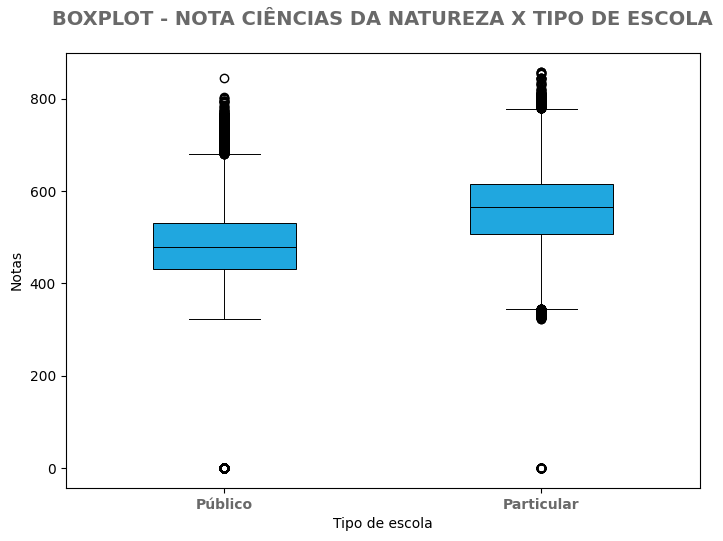

In [59]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_CN', color='#00B4FF', linecolor="black", linewidth=.70, gap=.1, width=.5)
nlabels=['Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA CIÊNCIAS DA NATUREZA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota de ciências da natureza em relação a o tipo de escola**

---
Notável que as notas daqueles que estudam ou estudaram em escolas particulares são maiores que as notas do ensino público




<ipython-input-60-b737319b5310>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


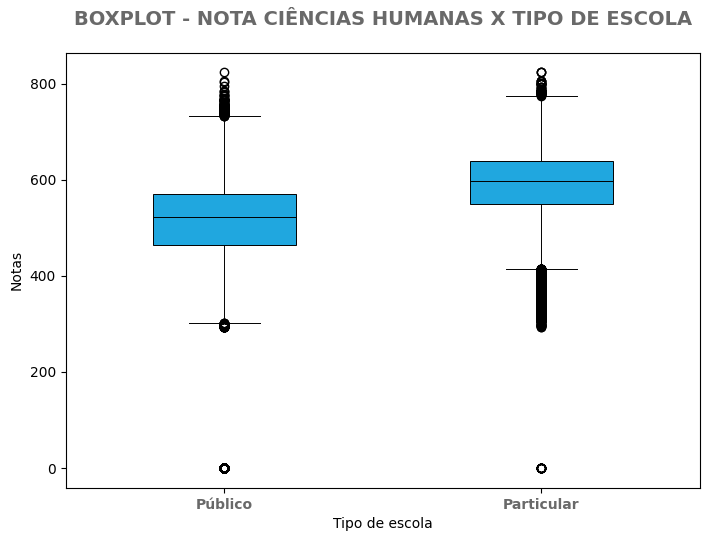

In [60]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_CH', color='#00B4FF', linecolor="black", linewidth=.70, gap=.1, width=.5)

nlabels=['Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA CIÊNCIAS HUMANAS X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota de ciências humanas em relação a o tipo de escola**

---
Notável que as notas daqueles que estudam ou estudaram em escolas particulares são maiores que as notas do ensino público




<ipython-input-61-482a56e8f25e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


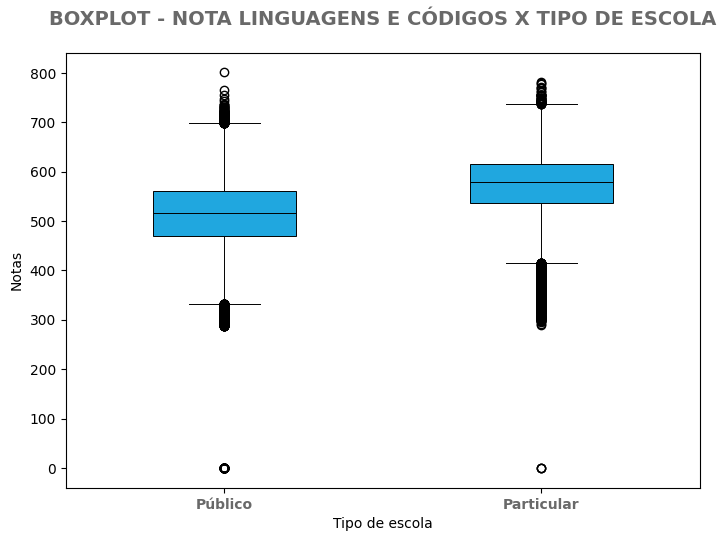

In [61]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_LC', color='#00B4FF', linecolor="black", linewidth=.70, gap=.1, width=.5)

nlabels=['Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA LINGUAGENS E CÓDIGOS X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota de linguagens e códigos em relação a o tipo de escola**

---
Notável que as notas daqueles que estudam ou estudaram em escolas particulares são maiores que as notas do ensino público




<ipython-input-62-5d1ef70cfa9a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


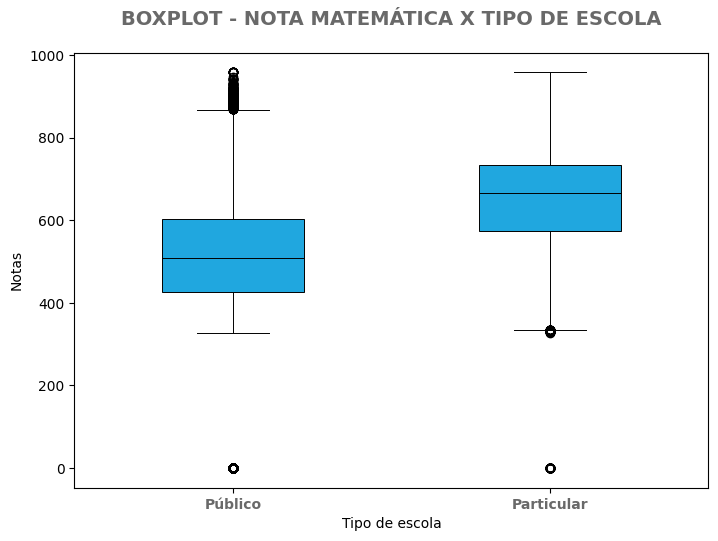

In [62]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_MT', color='#00B4FF', linecolor="black", linewidth=.70, gap=.1, width=.5)

nlabels=['Público', 'Particular']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA MATEMÁTICA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota de matemática em relação a o tipo de escola**

---
Notável que as notas daqueles que estudam ou estudaram em escolas particulares são maiores que as notas do ensino público




<ipython-input-63-d8ac1d540126>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


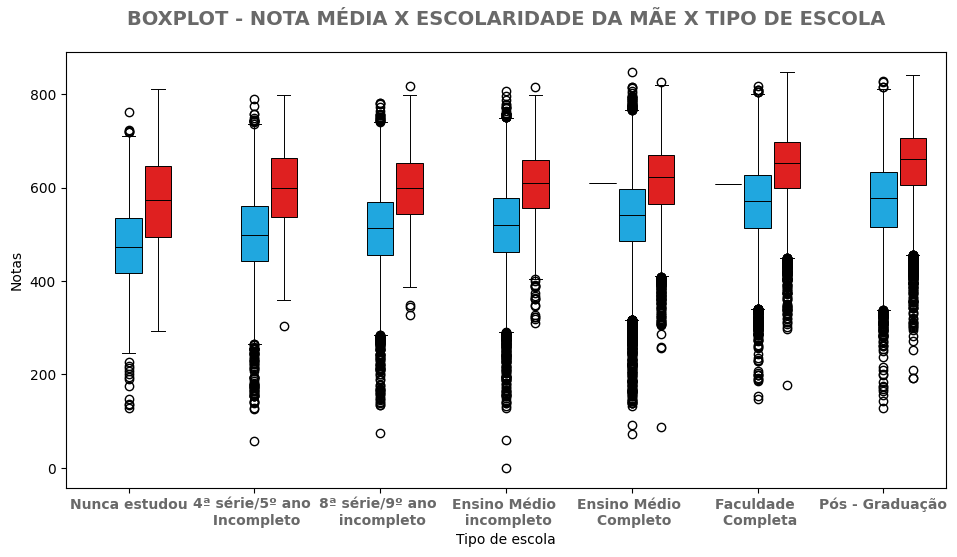

In [63]:
dados_filtrados = dados_cru[~dados_cru['Q002'].isin(['H'])]
renda_ordenada = dados_filtrados.Q002.unique()
renda_ordenada.sort()

palette = ["#0000FF", "#00B4FF", "#FF0000"]

plt.figure(figsize =(25,5.65))
ax2= plt.subplot(1,2,1)


plot = sns.boxplot(data = dados_filtrados, x = 'Q002', y ='NOTA_MEDIA', hue = 'TP_ESCOLA', order = renda_ordenada, palette=palette, legend=False, linecolor="black", linewidth=.70, gap=.1, width=.7)
nlabels=['Nunca estudou', '4ª série/5º ano \n Incompleto', '8ª série/9º ano \n incompleto','Ensino Médio \n incompleto', 'Ensino Médio \n Completo', 'Faculdade \n Completa', 'Pós - Graduação']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


plt.title('BOXPLOT - NOTA MÉDIA X ESCOLARIDADE DA MÃE X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota média dos participantes em relação a escolaridade da mãe e o tipo de escola**

---
Como já visto anteriormente é perceptivel a diferença superior entre as notas do ensino **particular (vermelho)** e o **ensino público (azul)**.

Mas neste gráfico em especifico podemos notar que **conforme a escolaridade da mãe for maior**, mesmo que o participante seja de escola pública **ele ainda obtém uma nota maior** do que aqueles que possuem uma escolaridade da mãe inferior. **Ou seja a escolaridade da mãe pode interferir mais que o tipo de escolaridade.**


<ipython-input-64-bd9aed9dd657>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')


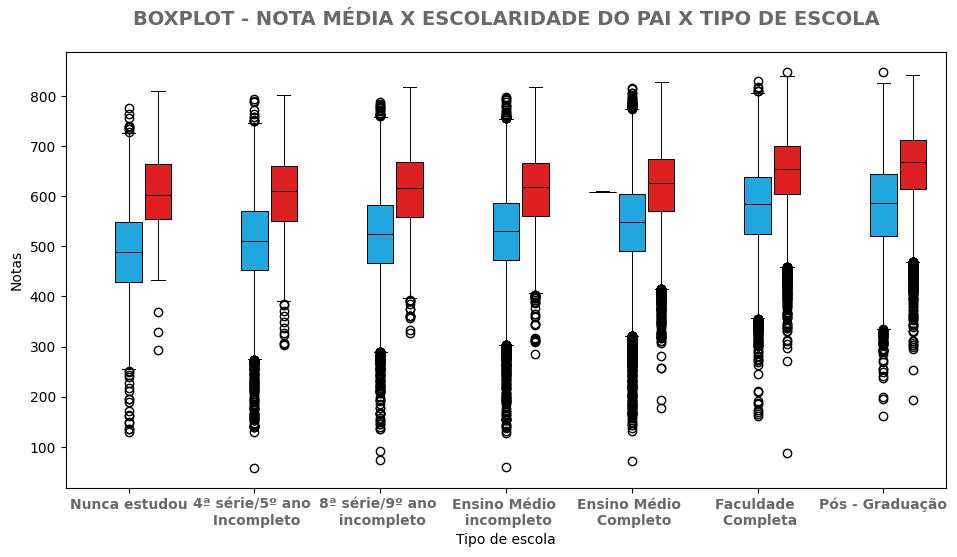

In [64]:
dados_filtrados = dados_cru[~dados_cru['Q001'].isin(['H'])]
renda_ordenada = dados_filtrados.Q001.unique()
renda_ordenada.sort()

palette = ["#0000FF", "#00B4FF", "#FF0000"]

plt.figure(figsize =(25,5.65))
ax2= plt.subplot(1,2,1)


plot=sns.boxplot(data = dados_filtrados, x = 'Q001', y ='NOTA_MEDIA', hue = 'TP_ESCOLA', order = renda_ordenada, palette=palette, legend=False, linecolor="black", linewidth=.70, gap=.1, width=.7)

nlabels=['Nunca estudou', '4ª série/5º ano \n Incompleto', '8ª série/9º ano \n incompleto','Ensino Médio \n incompleto', 'Ensino Médio \n Completo', 'Faculdade \n Completa', 'Pós - Graduação']
plot.set_xticklabels(labels=nlabels, fontsize=10, color='dimgrey', fontweight = 'bold')

plt.title('BOXPLOT - NOTA MÉDIA X ESCOLARIDADE DO PAI X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Notas', fontsize=10, color='black');

### Box - Plot referente a **nota média dos participantes em relação a escolaridade do pai e o tipo de escola**

---
Como já visto anteriormente é perceptivel a diferença superior entre as notas do ensino **particular (vermelho)** e o **ensino público (azul)**.

Mas neste gráfico em especifico podemos notar que **conforme a escolaridade do pai for maior**, mesmo que o participante seja de escola pública **ele ainda obtém uma nota maior** do que aqueles que possuem uma escolaridade da mãe inferior. **Ou seja a escolaridade do pai pode interferir mais que o tipo de escolaridade.**


# ANALISES DEMOGRÁFICAS

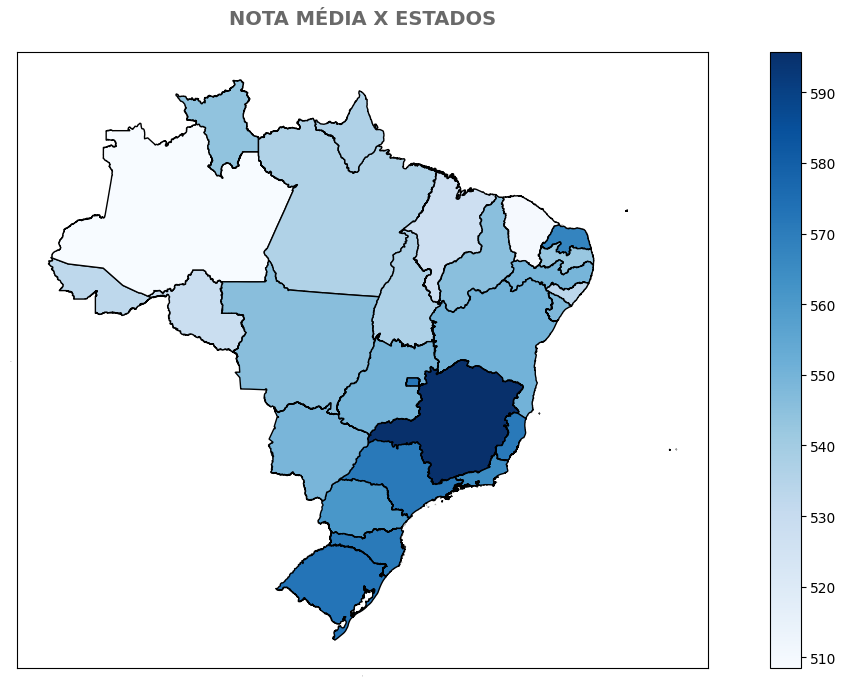

In [65]:

ax2 = BRASIL.plot(column='NOTA_MEDIA',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA MÉDIA X ESTADOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [66]:
NOTA_UF = dados_cru[['NU_NOTA_CN', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()
NOTA_UF



NU_NOTA_CN
SG_UF_ESC            
AC         477.061315
AL         481.790630
AM         469.388415
AP         480.882394
BA         495.860885
CE         465.749944
DF         516.414733
ES         509.980277
GO         497.563222
MA         472.611270
MG         531.449666
MS         499.492345
MT         494.381150
PA         482.387325
PB         487.074726
PE         492.612886
PI         487.642208
PR         508.960446
RJ         506.586771
RN         506.846745
RO         478.615401
RR         495.825000
RS         510.922209
SC         512.912162
SE         489.866275
SP         512.176419
TO         484.826267

In [67]:
BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_CN', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

BRASIL

SG_UF_ESC  NU_NOTA_CN                                           geometry
0         RO  478.615401  MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...
1         AC  477.061315  MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...
2         AM  469.388415  MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...
3         RR  495.825000  MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...
4         PA  482.387325  MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...
5         AP  480.882394  MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...
6         TO  484.826267  MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...
7         MA  472.611270  MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...
8         PI  487.642208  MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...
9         CE  465.749944  MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...
10        RN  506.846745  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ...
11        PB  487.074726  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ...
12        PE  492.612886  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ...
13        AL  481.790630  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...
14        SE  489.866275  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681...
15        BA  495.860885  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...
16        MG  531.449666  MULTIPOLYGON (((-50.74037 -19.21316, -50.74013...
17        ES  509.980277  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...
18        RJ  506.586771  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939...
19        SP  512.176419  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...
20        PR  508.960446  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750...
21        SC  512.912162  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096...
22        RS  510.922209  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402...
23        MS  499.492345  MULTIPOLYGON (((-57.83371 -20.93628, -57.83553...
24        MT  494.381150  MULTIPOLYGON (((-61.54023 -10.00021, -61.54014...
25        GO  497.563222  MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...
26        DF  516.414733  MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...

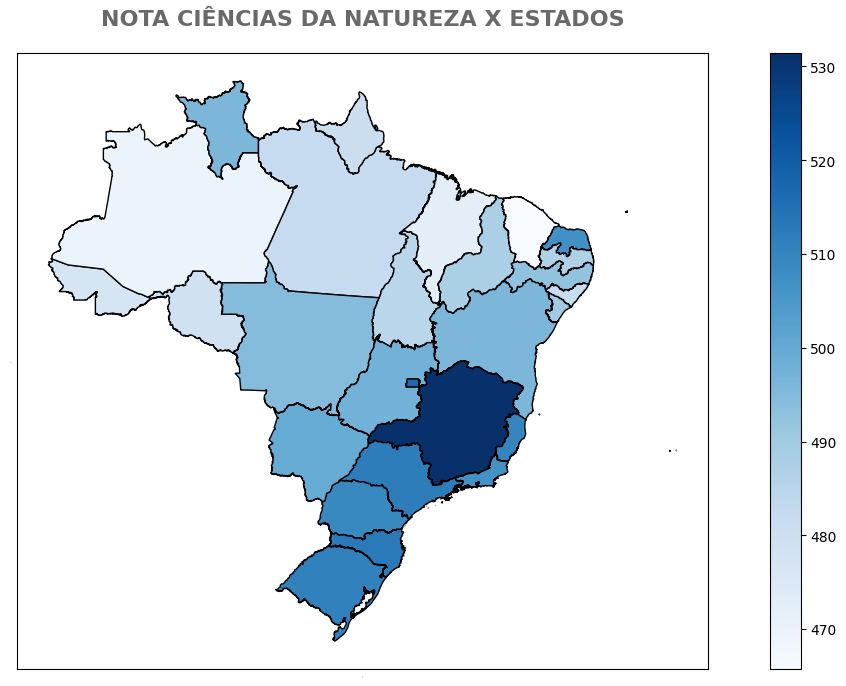

In [68]:
ax2 = BRASIL.plot(column='NU_NOTA_CN',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA CIÊNCIAS DA NATUREZA X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

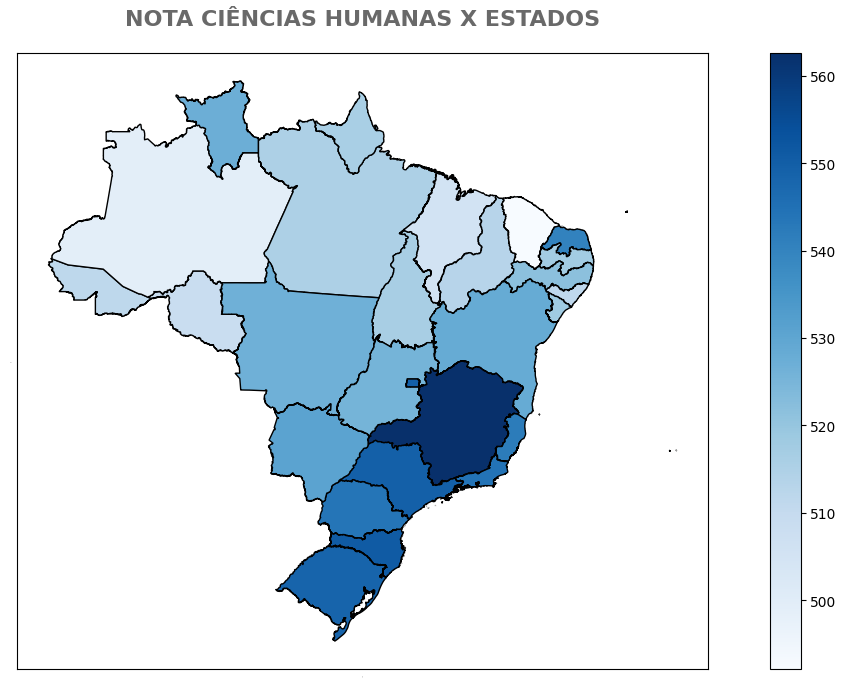

In [69]:
NOTA_UF = dados_cru[['NU_NOTA_CH', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_CH', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_CH',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA CIÊNCIAS HUMANAS X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

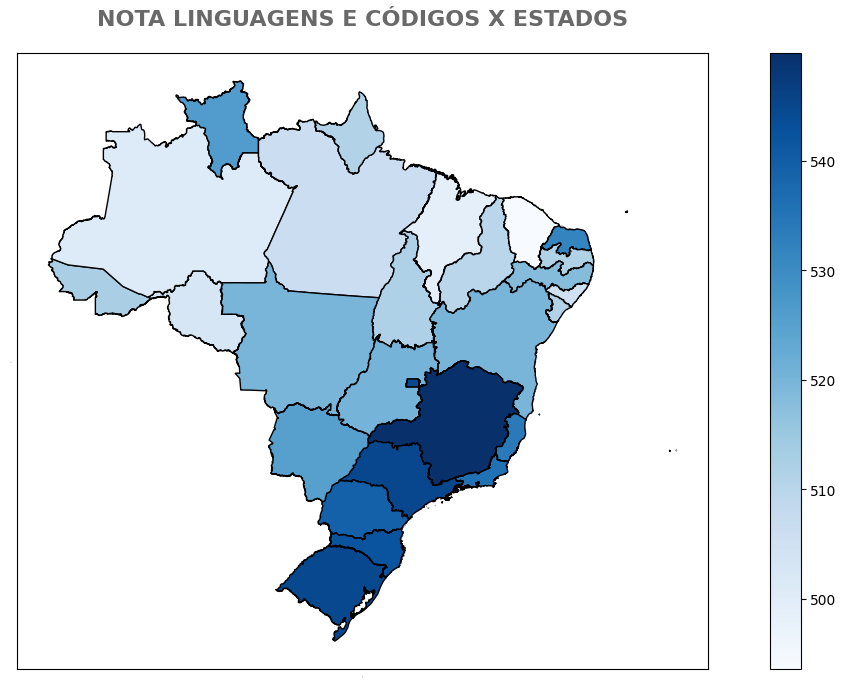

In [70]:
NOTA_UF = dados_cru[['NU_NOTA_LC', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_LC', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_LC',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA LINGUAGENS E CÓDIGOS X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

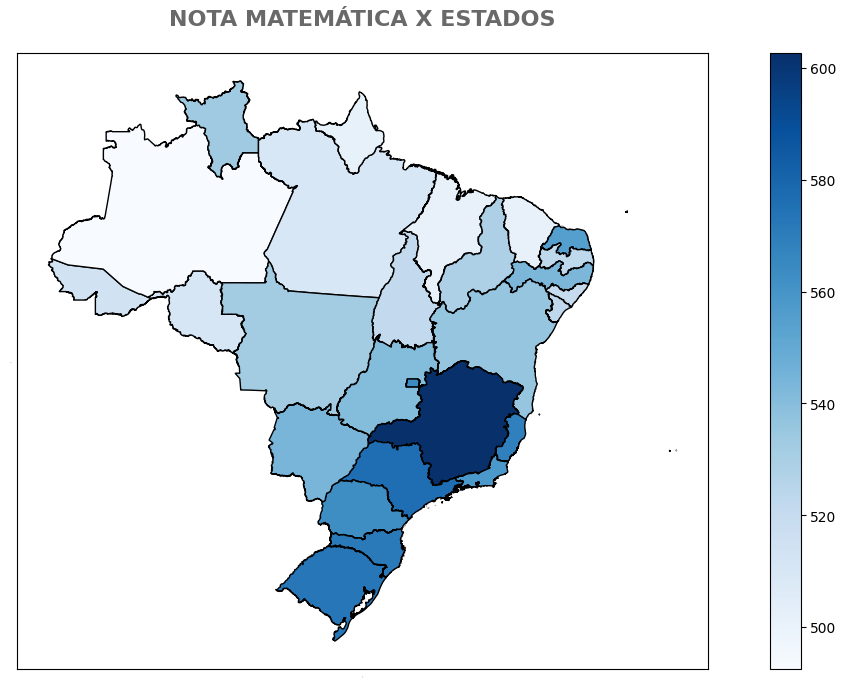

In [71]:
NOTA_UF = dados_cru[['NU_NOTA_MT', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_MT', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_MT',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA MATEMÁTICA X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

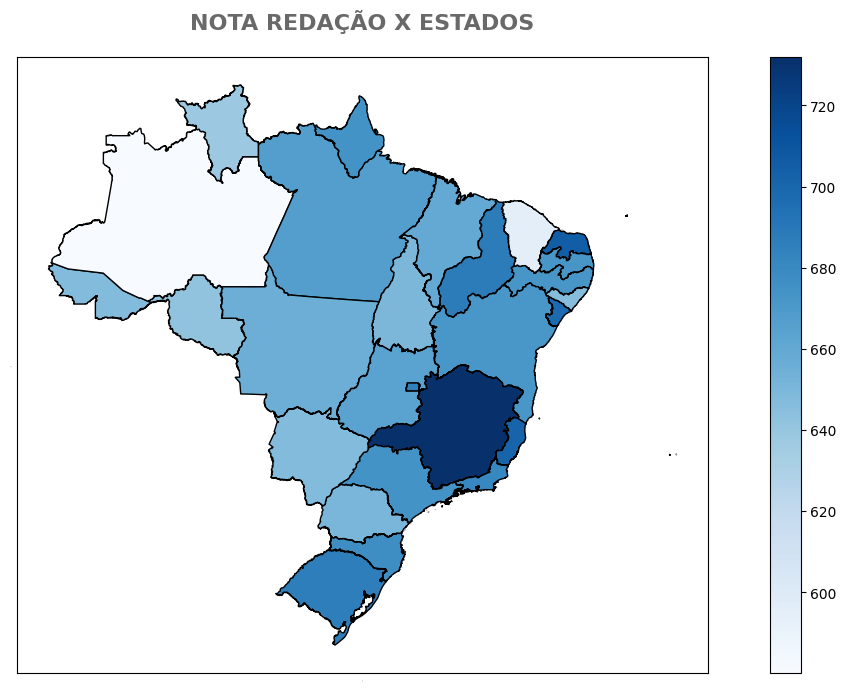

In [72]:
NOTA_UF = dados_cru[['NU_NOTA_REDACAO', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_REDACAO', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_REDACAO',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA REDAÇÃO X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()